In [169]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np

In [170]:
#ackodrive relevant
company=[]
model=[]
body_type=[]
seaters=[]
Fuel_type=[]
variants=[]
trans=[]
no_color=[]
price=[]
for i in range(1,7):
    url="https://ackodrive.com/cars/page/"+str(i)+"/?utm_source=google&utm_medium=cpc&utm_campaign=AD_PerfMax_MMV_AllCars_AllCity&utm_adgroup=&utm_term=&utm_content=&utm_Sitelink=&utm_device=c&utm_location=9062134&gad_source=1&gclid=Cj0KCQjwsuSzBhCLARIsAIcdLm5RbAfpGvnESvlHM8Lyhda9ZggRg6kJ-ziGNKfwXr_WXTkpoaIkej0aArGIEALw_wcB&sortBy=relevance"
    page=requests.get(url)
    soup=BeautifulSoup(page.text)
  
    for i in soup.find_all("h2",class_="styles__ModelTitle-sc-57d31ed8-4 LQrbf"):
        a=i.text.split(" ")[0]
        company.append(a)
    
    
    for i in soup.find_all("h2",class_="styles__ModelTitle-sc-57d31ed8-4 LQrbf"):
        a=i.text.split(" ")[1]
        model.append(a)
    
    
    for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
        a=re.findall("SUV|Minivan/Van|MPV/MUV|Hatchback|Sedan|Convertible",i.text)
        if len(a)>0:
            body_type.append("".join(a))
    
    

    for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
        a=re.findall("(\d+)\sSeater",i.text)
        if len(a)>0:
            seaters.append("".join(a))


    
    for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
        a=re.findall("Petrol|Electric|CNG|Diesel",i.text)
        if len(a)>0:
            Fuel_type.append("".join(a))



    for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy"):
        a=re.findall("\d.(\d+)\svariants|(\d)\svariant",i.text)
        # print(a)
        if len(a)>0:
            variants.append("".join(a[0]))
        elif len(a)>0:
            variants.append("".join(a[0]))
    
        

    for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
        a=re.findall("Automatic|Manual",i.text)
        if len(a)>0:
            trans.append("".join(a))   
       
    # Available in 7 colors
   
    for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
        a=re.findall("\w+\s\w+\s(\d)\scolors|\w+\s\w+\s(\d+)\scolors|\w+\s\w+\s(\d)\scolor",i.text)#Available in 1 color
        if len(a)>0:
            no_color.append("".join(a[0]))
        elif len(a)>0:
            no_color.append("".join(a[0]))
            
   
    for i in soup.find_all("div",class_="styles__Price-sc-57d31ed8-18 btbaoV"):
        a=i.text
        price.append(a)
        

In [171]:
d={"Company":company,
   "Model":model,
   "Body_type":body_type,
   "Varients":variants,
   "Seaters":seaters,
   "Fuel_type":Fuel_type,
   "Transmission":trans,
   "Avaliable_No_of_color":no_color,
   "Price":price}

In [172]:
df=pd.DataFrame(d)
df

,Company,Model,Body_type,Varients,Seaters,Fuel_type,Transmission,Avaliable_No_of_color,Price
0,Tata,Nexon,SUV,85,5,Petrol,Manual,7,₹13.15 L
1,Tata,Punch,SUV,25,5,CNG,Manual,4,₹9.90 L
2,Hyundai,Grand,Hatchback,11,5,Petrol,Manual,7,₹8.00 L
3,Hyundai,Aura,Sedan,7,5,Petrol,Manual,6,₹9.63 L
4,Tata,Tigor,Sedan,17,5,Petrol,Manual,4,₹9.25 L
...,...,...,...,...,...,...,...,...,...
82,Maruti,Suzuki,Convertible,9,5,Petrol,Manual,6,₹8.45 L
83,Mahindra,XUV300,SUV,16,5,Petrol,Manual,5,₹9.59 L
84,Toyota,Fortuner,SUV,7,7,Petrol,Manual,7,₹41.46 L
85,Toyota,Fortuner,SUV,2,7,Diesel,Automatic,1,₹53.96 L


In [173]:
#aco-price-high to low
company=[]
model=[]
body_type=[]
seaters=[]
Fuel_type=[]
variants=[]
trans=[]
no_color=[]
price=[]
for i in range(1,7):
    url="https://ackodrive.com/cars/page/"+str(i)+"?utm_source=google&utm_medium=cpc&utm_campaign=AD_PerfMax_MMV_AllCars_AllCity&utm_adgroup=&utm_term=&utm_content=&utm_Sitelink=&utm_device=c&utm_location=9062134&gad_source=1&gclid=Cj0KCQjwsuSzBhCLARIsAIcdLm5RbAfpGvnESvlHM8Lyhda9ZggRg6kJ-ziGNKfwXr_WXTkpoaIkej0aArGIEALw_wcB&sortBy=price-high-low"
    page=requests.get(url)
    soup=BeautifulSoup(page.text)
  
    for i in soup.find_all("h2",class_="styles__ModelTitle-sc-57d31ed8-4 LQrbf"):
        a=i.text.split(" ")[0]
        company.append(a)
    
    
    for i in soup.find_all("h2",class_="styles__ModelTitle-sc-57d31ed8-4 LQrbf"):
        a=i.text.split(" ")[1]
        model.append(a)
    
    
    for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
        a=re.findall("SUV|Minivan/Van|MPV/MUV|Hatchback|Sedan|Convertible",i.text)
        if len(a)>0:
            body_type.append("".join(a))
    
    

    for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
        a=re.findall("(\d+)\sSeater",i.text)
        if len(a)>0:
            seaters.append("".join(a))


    
    for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
        a=re.findall("Petrol|Electric|CNG|Diesel",i.text)
        if len(a)>0:
            Fuel_type.append("".join(a))



    for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy"):
        a=re.findall("\d.(\d+)\svariants|(\d)\svariant",i.text)
        # print(a)
        if len(a)>0:
            variants.append("".join(a[0]))
        elif len(a)>0:
            variants.append("".join(a[0]))
    
        

    for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
        a=re.findall("Automatic|Manual",i.text)
        if len(a)>0:
            trans.append("".join(a))   
       
    # Available in 7 colors
   
    for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
        a=re.findall("\w+\s\w+\s(\d)\scolors|\w+\s\w+\s(\d+)\scolors|\w+\s\w+\s(\d)\scolor",i.text)#Available in 1 color
        if len(a)>0:
            no_color.append("".join(a[0]))
        elif len(a)>0:
            no_color.append("".join(a[0]))
            
   
    for i in soup.find_all("div",class_="styles__Price-sc-57d31ed8-18 btbaoV"):
        a=i.text
        price.append(a)
        

In [174]:
d1={"Company":company,
   "Model":model,
   "Body_type":body_type,
   "Varients":variants,
   "Seaters":seaters,
   "Fuel_type":Fuel_type,
   "Transmission":trans,
   "Avaliable_No_of_color":no_color,
   "Price":price}

In [175]:
df1=pd.DataFrame(d1)
df1

,Company,Model,Body_type,Varients,Seaters,Fuel_type,Transmission,Avaliable_No_of_color,Price
0,Toyota,Fortuner,SUV,7,7,Diesel,Automatic,1,₹63.65 L
1,Toyota,Fortuner,SUV,2,7,Diesel,Automatic,1,₹58.83 L
2,Skoda,Kodiaq,SUV,1,7,Petrol,Automatic,4,₹52.19 L
3,MG,Gloster,SUV,5,6,Diesel,Automatic,4,₹51.69 L
4,Jeep,Meridian,SUV,7,7,Diesel,Automatic,6,₹49.83 L
...,...,...,...,...,...,...,...,...,...
82,Maruti,Suzuki,Hatchback,8,5,Petrol,Automatic,7,₹8.15 L
83,Maruti,Suzuki,Minivan/Van,4,5,CNG,Manual,5,₹8.03 L
84,Renault,Kwid,Hatchback,5,5,Petrol,Automatic,4,₹7.83 L
85,Maruti,Suzuki,SUV,7,4,CNG,Manual,6,₹7.07 L


In [176]:
#ack-price low to high
company=[]
model=[]
body_type=[]
seaters=[]
Fuel_type=[]
variants=[]
trans=[]
no_color=[]
price=[]
for i in range(1,7):
    url="https://ackodrive.com/cars/page/"+str(i)+"/?utm_source=google&utm_medium=cpc&utm_campaign=AD_PerfMax_MMV_AllCars_AllCity&utm_adgroup=&utm_term=&utm_content=&utm_Sitelink=&utm_device=c&utm_location=9062134&gad_source=1&gclid=Cj0KCQjwsuSzBhCLARIsAIcdLm5RbAfpGvnESvlHM8Lyhda9ZggRg6kJ-ziGNKfwXr_WXTkpoaIkej0aArGIEALw_wcB&sortBy=price-low-high"
    page=requests.get(url)
    soup=BeautifulSoup(page.text)
  
    for i in soup.find_all("h2",class_="styles__ModelTitle-sc-57d31ed8-4 LQrbf"):
        a=i.text.split(" ")[0]
        company.append(a)
    
    
    for i in soup.find_all("h2",class_="styles__ModelTitle-sc-57d31ed8-4 LQrbf"):
        a=i.text.split(" ")[1]
        model.append(a)
    
    
    for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
        a=re.findall("SUV|Minivan/Van|MPV/MUV|Hatchback|Sedan|Convertible",i.text)
        if len(a)>0:
            body_type.append("".join(a))
    
    

    for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
        a=re.findall("(\d+)\sSeater",i.text)
        if len(a)>0:
            seaters.append("".join(a))


    
    for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
        a=re.findall("Petrol|Electric|CNG|Diesel",i.text)
        if len(a)>0:
            Fuel_type.append("".join(a))



    for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy"):
        a=re.findall("\d.(\d+)\svariants|(\d)\svariant",i.text)
        # print(a)
        if len(a)>0:
            variants.append("".join(a[0]))
        elif len(a)>0:
            variants.append("".join(a[0]))
    
        

    for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
        a=re.findall("Automatic|Manual",i.text)
        if len(a)>0:
            trans.append("".join(a))   
       
    # Available in 7 colors
   
    for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
        a=re.findall("\w+\s\w+\s(\d)\scolors|\w+\s\w+\s(\d+)\scolors|\w+\s\w+\s(\d)\scolor",i.text)#Available in 1 color
        if len(a)>0:
            no_color.append("".join(a[0]))
        elif len(a)>0:
            no_color.append("".join(a[0]))
            
   
    for i in soup.find_all("div",class_="styles__Price-sc-57d31ed8-18 btbaoV"):
        a=i.text
        price.append(a)
        

In [177]:
d2={"Company":company,
   "Model":model,
   "Body_type":body_type,
   "Varients":variants,
   "Seaters":seaters,
   "Fuel_type":Fuel_type,
   "Transmission":trans,
   "Avaliable_No_of_color":no_color,
   "Price":price}

In [178]:
df2=pd.DataFrame(d2)
df2.duplicated().sum()
df2

,Company,Model,Body_type,Varients,Seaters,Fuel_type,Transmission,Avaliable_No_of_color,Price
0,Maruti,Suzuki,Hatchback,7,5,Petrol,Manual,6,₹5.53 L
1,Maruti,Suzuki,SUV,7,4,Petrol,Manual,6,₹5.75 L
2,Renault,Kwid,Hatchback,5,5,Petrol,Manual,5,₹6.04 L
3,Maruti,Suzuki,Hatchback,8,5,Petrol,Manual,6,₹6.19 L
4,Tata,Tiago,Hatchback,19,5,Petrol,Manual,3,₹6.41 L
...,...,...,...,...,...,...,...,...,...
82,Volkswagen,Tiguan,SUV,1,5,Petrol,Automatic,7,₹43.50 L
83,MG,Gloster,SUV,5,6,Diesel,Automatic,4,₹45.53 L
84,Citroen,C5,SUV,1,5,Diesel,Automatic,7,₹47.35 L
85,Skoda,Kodiaq,SUV,1,7,Petrol,Automatic,4,₹52.19 L


In [179]:
#acko-discount-price
company=[]
model=[]
body_type=[]
seaters=[]
Fuel_type=[]
variants=[]
trans=[]
no_color=[]
price=[]
for i in range(1,7):
    url="https://ackodrive.com/cars/page/"+str(i)+"/?utm_source=google&utm_medium=cpc&utm_campaign=AD_PerfMax_MMV_AllCars_AllCity&utm_adgroup=&utm_term=&utm_content=&utm_Sitelink=&utm_device=c&utm_location=9062134&gad_source=1&gclid=Cj0KCQjwsuSzBhCLARIsAIcdLm5RbAfpGvnESvlHM8Lyhda9ZggRg6kJ-ziGNKfwXr_WXTkpoaIkej0aArGIEALw_wcB&sortBy=discount-high-low"
    page=requests.get(url)
    soup=BeautifulSoup(page.text)
  
    for i in soup.find_all("h2",class_="styles__ModelTitle-sc-57d31ed8-4 LQrbf"):
        a=i.text.split(" ")[0]
        company.append(a)
    
    
    for i in soup.find_all("h2",class_="styles__ModelTitle-sc-57d31ed8-4 LQrbf"):
        a=i.text.split(" ")[1]
        model.append(a)
    
    
    for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
        a=re.findall("SUV|Minivan/Van|MPV/MUV|Hatchback|Sedan|Convertible",i.text)
        if len(a)>0:
            body_type.append("".join(a))
    
    

    for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
        a=re.findall("(\d+)\sSeater",i.text)
        if len(a)>0:
            seaters.append("".join(a))


    
    for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
        a=re.findall("Petrol|Electric|CNG|Diesel",i.text)
        if len(a)>0:
            Fuel_type.append("".join(a))



    for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy"):
        a=re.findall("\d.(\d+)\svariants|(\d+)\svariant",i.text)
        # print(a)
        if len(a)>0:
            variants.append("".join(a[0]))
        elif len(a)>0:
            variants.append("".join(a[0]))
    
        

    for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
        a=re.findall("Automatic|Manual",i.text)
        if len(a)>0:
            trans.append("".join(a))   
       
    # Available in 7 colors
   
    for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
        a=re.findall("\w+\s\w+\s(\d)\scolors|\w+\s\w+\s(\d+)\scolors|\w+\s\w+\s(\d)\scolor",i.text)#Available in 1 color
        if len(a)>0:
            no_color.append("".join(a[0]))
        elif len(a)>0:
            no_color.append("".join(a[0]))
            
   
    for i in soup.find_all("div",class_="styles__Price-sc-57d31ed8-18 btbaoV"):
        a=i.text
        price.append(a)
        

In [180]:
d3={"Company":company,
   "Model":model,
   "Body_type":body_type,
   "Varients":variants,
   "Seaters":seaters,
   "Fuel_type":Fuel_type,
   "Transmission":trans,
   "Avaliable_No_of_color":no_color,
   "Price":price}

In [181]:
df3=pd.DataFrame(d3)
df3.duplicated().sum()


0

In [182]:
df3

,Company,Model,Body_type,Varients,Seaters,Fuel_type,Transmission,Avaliable_No_of_color,Price
0,Mahindra,XUV700,SUV,51,5,Diesel,Automatic,6,₹24.83 L
1,Mahindra,XUV300,SUV,16,5,Diesel,Automatic,5,₹16.81 L
2,Mahindra,Scorpio-N,SUV,30,7,Diesel,Automatic,7,₹30.79 L
3,Mahindra,Marazzo,MPV/MUV,3,7,Diesel,Manual,4,₹19.74 L
4,Toyota,Fortuner,SUV,2,7,Diesel,Automatic,1,₹58.83 L
...,...,...,...,...,...,...,...,...,...
82,Maruti,Suzuki,Hatchback,9,5,Petrol,Automatic,7,₹11.62 L
83,Maruti,Suzuki,SUV,9,7,Petrol,Automatic,7,₹16.17 L
84,Maruti,Suzuki,Minivan/Van,4,5,Petrol,Manual,5,₹6.88 L
85,Maruti,Suzuki,Hatchback,7,5,Petrol,Automatic,6,₹8.36 L


In [183]:
df_1=pd.concat([df,df1,df2,df3]) #all cars in acko buyer page
df_1

,Company,Model,Body_type,Varients,Seaters,Fuel_type,Transmission,Avaliable_No_of_color,Price
0,Tata,Nexon,SUV,85,5,Petrol,Manual,7,₹13.15 L
1,Tata,Punch,SUV,25,5,CNG,Manual,4,₹9.90 L
2,Hyundai,Grand,Hatchback,11,5,Petrol,Manual,7,₹8.00 L
3,Hyundai,Aura,Sedan,7,5,Petrol,Manual,6,₹9.63 L
4,Tata,Tigor,Sedan,17,5,Petrol,Manual,4,₹9.25 L
...,...,...,...,...,...,...,...,...,...
82,Maruti,Suzuki,Hatchback,9,5,Petrol,Automatic,7,₹11.62 L
83,Maruti,Suzuki,SUV,9,7,Petrol,Automatic,7,₹16.17 L
84,Maruti,Suzuki,Minivan/Van,4,5,Petrol,Manual,5,₹6.88 L
85,Maruti,Suzuki,Hatchback,7,5,Petrol,Automatic,6,₹8.36 L


In [184]:
#ACKO EXPRESS Delivery---Revalance


In [185]:
url="https://ackodrive.com/collection/express-delivery-cars/?sortBy=relevance"
page=requests.get(url)
soup=BeautifulSoup(page.text)
company=[]
model=[]
body_type=[]
seaters=[]
Fuel_type=[]
variants=[]
trans=[]
no_color=[]
price=[]
for i in soup.find_all("h2",class_="styles__ModelTitle-sc-57d31ed8-4 LQrbf"):
    a=i.text.split(" ")[0]
    company.append(a)
    
    
for i in soup.find_all("h2",class_="styles__ModelTitle-sc-57d31ed8-4 LQrbf"):
    a=i.text.split(" ")[1]
    model.append(a)
    
    
for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
    a=re.findall("SUV|Minivan/Van|MPV/MUV|Hatchback|Sedan|Convertible",i.text)
    if len(a)>0:
        body_type.append("".join(a))
    
    

for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
    a=re.findall("(\d+)\sSeater",i.text)
    if len(a)>0:
        seaters.append("".join(a))


    
for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
    a=re.findall("Petrol|Electric|CNG|Diesel",i.text)
    if len(a)>0:
        Fuel_type.append("".join(a))



for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy"):
    a=re.findall("\d.(\d+)\svariants|(\d)\svariant",i.text)
        # print(a)
    if len(a)>0:
        variants.append("".join(a[0]))
    elif len(a)>0:
        variants.append("".join(a[0]))
    
        

for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
    a=re.findall("Automatic|Manual",i.text)
    if len(a)>0:
        trans.append("".join(a))   
       
    # Available in 7 colors
   
for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
    a=re.findall("\w+\s\w+\s(\d)\scolors|\w+\s\w+\s(\d+)\scolors|\w+\s\w+\s(\d)\scolor",i.text)#Available in 1 color
    if len(a)>0:
        no_color.append("".join(a[0]))
    elif len(a)>0:
        no_color.append("".join(a[0]))
            
   
for i in soup.find_all("div",class_="styles__Price-sc-57d31ed8-18 btbaoV"):
    a=i.text
    price.append(a)
        

In [186]:
ex1r={"Company":company,
   "Model":model,
   "Body_type":body_type,
   "Varients":variants,
   "Seaters":seaters,
   "Fuel_type":Fuel_type,
   "Transmission":trans,
   "Avaliable_No_of_color":no_color,
   "Price":price}

In [187]:
ex_df=pd.DataFrame(ex1r)
ex_df

,Company,Model,Body_type,Varients,Seaters,Fuel_type,Transmission,Avaliable_No_of_color,Price
0,Tata,Nexon,SUV,52,5,Petrol,Manual,7,₹13.15 L
1,Tata,Punch,SUV,21,5,CNG,Manual,1,₹9.90 L
2,Hyundai,Grand,Hatchback,5,5,Petrol,Manual,1,₹8.00 L
3,Hyundai,Aura,Sedan,4,5,Petrol,Manual,2,₹9.63 L
4,Tata,Tigor,Sedan,6,5,Petrol,Manual,1,₹9.25 L
5,Tata,Altroz,Hatchback,21,5,Petrol,Automatic,2,₹10.59 L
6,Tata,Tiago,Hatchback,11,5,CNG,Manual,1,₹8.07 L
7,Hyundai,Venue,SUV,9,5,Petrol,Manual,2,₹10.58 L
8,Hyundai,Creta,SUV,4,5,Petrol,Manual,1,₹18.85 L
9,Hyundai,Alcazar,SUV,6,7,Diesel,Manual,1,₹24.29 L


In [188]:
company=[]
model=[]
body_type=[]
seaters=[]
Fuel_type=[]
variants=[]
trans=[]
no_color=[]
price=[]
for i in range(2,5):
    url="https://ackodrive.com/collection/express-delivery-cars/page/"+str(i)+"/?sortBy=relevance"
    page=requests.get(url)
    soup=BeautifulSoup(page.text)
    for i in soup.find_all("h2",class_="styles__ModelTitle-sc-57d31ed8-4 LQrbf"):
        a=i.text.split(" ")[0]
        company.append(a)
        
        
    for i in soup.find_all("h2",class_="styles__ModelTitle-sc-57d31ed8-4 LQrbf"):
        a=i.text.split(" ")[1]
        model.append(a)
        
        
    for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
        a=re.findall("SUV|Minivan/Van|MPV/MUV|Hatchback|Sedan|Convertible",i.text)
        if len(a)>0:
            body_type.append("".join(a))
        
        
    
    for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
        a=re.findall("(\d+)\sSeater",i.text)
        if len(a)>0:
            seaters.append("".join(a))
    
    
        
    for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
        a=re.findall("Petrol|Electric|CNG|Diesel",i.text)
        if len(a)>0:
            Fuel_type.append("".join(a))
    
    
    
    for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy"):
        a=re.findall("\d.(\d+)\svariants|(\d)\svariant",i.text)
            # print(a)
        if len(a)>0:
            variants.append("".join(a[0]))
        elif len(a)>0:
            variants.append("".join(a[0]))
        
            
    
    for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
        a=re.findall("Automatic|Manual",i.text)
        if len(a)>0:
            trans.append("".join(a))   
           
        # Available in 7 colors
       
    for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
        a=re.findall("\w+\s\w+\s(\d)\scolors|\w+\s\w+\s(\d+)\scolors|\w+\s\w+\s(\d)\scolor",i.text)#Available in 1 color
        if len(a)>0:
            no_color.append("".join(a[0]))
        elif len(a)>0:
            no_color.append("".join(a[0]))
                
       
    for i in soup.find_all("div",class_="styles__Price-sc-57d31ed8-18 btbaoV"):
        a=i.text
        price.append(a)
            

In [189]:
ex2r={"Company":company,
   "Model":model,
   "Body_type":body_type,
   "Varients":variants,
   "Seaters":seaters,
   "Fuel_type":Fuel_type,
   "Transmission":trans,
   "Avaliable_No_of_color":no_color,
   "Price":price}

In [190]:
ex_df1=pd.DataFrame(ex2r)
ex_df1

,Company,Model,Body_type,Varients,Seaters,Fuel_type,Transmission,Avaliable_No_of_color,Price
0,Maruti,Suzuki,SUV,8,5,Petrol,Manual,4,₹13.69 L
1,Hyundai,Venue,SUV,1,5,Petrol,Automatic,1,₹16.55 L
2,Mahindra,Scorpio-N,SUV,10,7,Diesel,Manual,1,₹20.54 L
3,Mahindra,XUV700,SUV,8,5,Diesel,Manual,1,₹22.86 L
4,Toyota,Urban,SUV,4,5,Petrol,Automatic,4,₹20.42 L
5,Toyota,Glanza,Hatchback,8,5,Petrol,Manual,4,₹8.40 L
6,Tata,Tiago,Hatchback,4,5,Electric,Automatic,2,₹11.86 L
7,MG,Hector,SUV,7,7,Diesel,Manual,2,₹21.24 L
8,MG,Hector,SUV,12,5,Petrol,Manual,3,₹19.40 L
9,MG,Comet,Hatchback,5,4,Electric,Automatic,1,₹8.25 L


In [191]:
ex_df1.duplicated().sum()

0

In [192]:
url="https://ackodrive.com/collection/express-delivery-cars/?sortBy=price-high-low"
page=requests.get(url)
soup=BeautifulSoup(page.text)
company=[]
model=[]
body_type=[]
seaters=[]
Fuel_type=[]
variants=[]
trans=[]
no_color=[]
price=[]
for i in soup.find_all("h2",class_="styles__ModelTitle-sc-57d31ed8-4 LQrbf"):
    a=i.text.split(" ")[0]
    company.append(a)
    
    
for i in soup.find_all("h2",class_="styles__ModelTitle-sc-57d31ed8-4 LQrbf"):
    a=i.text.split(" ")[1]
    model.append(a)
    
    
for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
    a=re.findall("SUV|Minivan/Van|MPV/MUV|Hatchback|Sedan|Convertible",i.text)
    if len(a)>0:
        body_type.append("".join(a))
    
    

for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
    a=re.findall("(\d+)\sSeater",i.text)
    if len(a)>0:
        seaters.append("".join(a))


    
for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
    a=re.findall("Petrol|Electric|CNG|Diesel",i.text)
    if len(a)>0:
        Fuel_type.append("".join(a))



for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy"):
    a=re.findall("\d.(\d+)\svariants|(\d)\svariant",i.text)
        # print(a)
    if len(a)>0:
        variants.append("".join(a[0]))
    elif len(a)>0:
        variants.append("".join(a[0]))
    
        

for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
    a=re.findall("Automatic|Manual",i.text)
    if len(a)>0:
        trans.append("".join(a))   
       
    # Available in 7 colors
   
for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
    a=re.findall("\w+\s\w+\s(\d)\scolors|\w+\s\w+\s(\d+)\scolors|\w+\s\w+\s(\d)\scolor",i.text)#Available in 1 color
    if len(a)>0:
        no_color.append("".join(a[0]))
    elif len(a)>0:
        no_color.append("".join(a[0]))
            
   
for i in soup.find_all("div",class_="styles__Price-sc-57d31ed8-18 btbaoV"):
    a=i.text
    price.append(a)
        

In [193]:
exdp={"Company":company,
   "Model":model,
   "Body_type":body_type,
   "Varients":variants,
   "Seaters":seaters,
   "Fuel_type":Fuel_type,
   "Transmission":trans,
   "Avaliable_No_of_color":no_color,
   "Price":price}

In [194]:
ex_df5=pd.DataFrame(exdp)
ex_df5.duplicated().sum()

0

In [195]:
ex_df5

,Company,Model,Body_type,Varients,Seaters,Fuel_type,Transmission,Avaliable_No_of_color,Price
0,Tata,Safari,SUV,15,7,Diesel,Automatic,1,₹33.82 L
1,Tata,Harrier,SUV,16,5,Diesel,Automatic,1,₹32.72 L
2,Mahindra,XUV700,SUV,8,5,Diesel,Automatic,4,₹32.46 L
3,Mahindra,Scorpio-N,SUV,10,7,Diesel,Automatic,1,₹30.79 L
4,MG,Hector,SUV,7,7,Petrol,Automatic,3,₹27.76 L
5,MG,Hector,SUV,12,5,Diesel,Manual,1,₹27.40 L
6,Hyundai,Alcazar,SUV,6,7,Diesel,Automatic,1,₹25.81 L
7,Hyundai,Creta,SUV,1,5,Petrol,Automatic,1,₹25.15 L
8,Toyota,Urban,SUV,4,5,Petrol,Automatic,8,₹25.15 L
9,Kia,Seltos,SUV,15,5,Petrol,Automatic,1,₹24.83 L


In [196]:
#ack-exp_delivery- price-high to low
company=[]
model=[]
body_type=[]
seaters=[]
Fuel_type=[]
variants=[]
trans=[]
no_color=[]
price=[]
for i in range(2,5):
    url="https://ackodrive.com/collection/express-delivery-cars/page/"+str(i)+"/?sortBy=price-high-low"
    # print(url)
    page=requests.get(url)
    soup=BeautifulSoup(page.text)
  
    for i in soup.find_all("h2",class_="styles__ModelTitle-sc-57d31ed8-4 LQrbf"):
        a=i.text.split(" ")[0]
        company.append(a)
    
    
    for i in soup.find_all("h2",class_="styles__ModelTitle-sc-57d31ed8-4 LQrbf"):
        a=i.text.split(" ")[1]
        model.append(a)
    
    
    for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
        a=re.findall("SUV|Minivan/Van|MPV/MUV|Hatchback|Sedan|Convertible",i.text)
        if len(a)>0:
            body_type.append("".join(a))
    
    

    for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
        a=re.findall("(\d+)\sSeater",i.text)
        if len(a)>0:
            seaters.append("".join(a))


    
    for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
        a=re.findall("Petrol|Electric|CNG|Diesel",i.text)
        if len(a)>0:
            Fuel_type.append("".join(a))



    for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy"):
        a=re.findall("\d.(\d+)\svariants|(\d)\svariant",i.text)
        # print(a)
        if len(a)>0:
            variants.append("".join(a[0]))
        elif len(a)>0:
            variants.append("".join(a[0]))
    
        

    for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
        a=re.findall("Automatic|Manual",i.text)
        if len(a)>0:
            trans.append("".join(a))   
       
    # Available in 7 colors
   
    for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
        a=re.findall("\w+\s\w+\s(\d)\scolors|\w+\s\w+\s(\d+)\scolors|\w+\s\w+\s(\d)\scolor",i.text)#Available in 1 color
        if len(a)>0:
            no_color.append("".join(a[0]))
        elif len(a)>0:
            no_color.append("".join(a[0]))
            
   
    for i in soup.find_all("div",class_="styles__Price-sc-57d31ed8-18 btbaoV"):
        a=i.text
        price.append(a)
        

In [197]:
ex3r={"Company":company,
   "Model":model,
   "Body_type":body_type,
   "Varients":variants,
   "Seaters":seaters,
   "Fuel_type":Fuel_type,
   "Transmission":trans,
   "Avaliable_No_of_color":no_color,
   "Price":price}

In [198]:
ex_df2=pd.DataFrame(ex3r)
ex_df2

,Company,Model,Body_type,Varients,Seaters,Fuel_type,Transmission,Avaliable_No_of_color,Price
0,Mahindra,Thar,SUV,6,4,Diesel,Automatic,3,₹21.52 L
1,Hyundai,Verna,Sedan,4,5,Petrol,Automatic,3,₹21.28 L
2,Mahindra,XUV400,SUV,2,5,Electric,Automatic,10,₹21.06 L
3,Skoda,Slavia,Sedan,1,5,Petrol,Automatic,2,₹20.95 L
4,Honda,Elevate,SUV,8,5,Petrol,Automatic,1,₹20.59 L
5,Skoda,Kushaq,SUV,1,5,Petrol,Manual,1,₹20.23 L
6,Honda,City,Sedan,6,5,Petrol,Automatic,2,₹19.68 L
7,Kia,Sonet,SUV,13,5,Diesel,Automatic,2,₹18.97 L
8,Tata,Punch,SUV,11,5,Electric,Automatic,4,₹18.64 L
9,Tata,Nexon,SUV,52,5,Diesel,Automatic,2,₹18.46 L


In [199]:
url="https://ackodrive.com/collection/express-delivery-cars/?sortBy=price-low-high"
page=requests.get(url)
soup=BeautifulSoup(page.text)
company=[]
model=[]
body_type=[]
seaters=[]
Fuel_type=[]
variants=[]
trans=[]
no_color=[]
price=[]
for i in soup.find_all("h2",class_="styles__ModelTitle-sc-57d31ed8-4 LQrbf"):
    a=i.text.split(" ")[0]
    company.append(a)
    
    
for i in soup.find_all("h2",class_="styles__ModelTitle-sc-57d31ed8-4 LQrbf"):
    a=i.text.split(" ")[1]
    model.append(a)
    
    
for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
    a=re.findall("SUV|Minivan/Van|MPV/MUV|Hatchback|Sedan|Convertible",i.text)
    if len(a)>0:
        body_type.append("".join(a))
    
    

for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
    a=re.findall("(\d+)\sSeater",i.text)
    if len(a)>0:
        seaters.append("".join(a))


    
for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
    a=re.findall("Petrol|Electric|CNG|Diesel",i.text)
    if len(a)>0:
        Fuel_type.append("".join(a))



for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy"):
    a=re.findall("\d.(\d+)\svariants|(\d)\svariant",i.text)
        # print(a)
    if len(a)>0:
        variants.append("".join(a[0]))
    elif len(a)>0:
        variants.append("".join(a[0]))
    
        

for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
    a=re.findall("Automatic|Manual",i.text)
    if len(a)>0:
        trans.append("".join(a))   
       
    # Available in 7 colors
   
for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
    a=re.findall("\w+\s\w+\s(\d)\scolors|\w+\s\w+\s(\d+)\scolors|\w+\s\w+\s(\d)\scolor",i.text)#Available in 1 color
    if len(a)>0:
        no_color.append("".join(a[0]))
    elif len(a)>0:
        no_color.append("".join(a[0]))
            
   
for i in soup.find_all("div",class_="styles__Price-sc-57d31ed8-18 btbaoV"):
    a=i.text
    price.append(a)
        

In [200]:
exdlh={"Company":company,
   "Model":model,
   "Body_type":body_type,
   "Varients":variants,
   "Seaters":seaters,
   "Fuel_type":Fuel_type,
   "Transmission":trans,
   "Avaliable_No_of_color":no_color,
   "Price":price}

In [201]:
ex_df6=pd.DataFrame(exdlh)
ex_df6.duplicated().sum()

0

In [202]:
ex_df6

,Company,Model,Body_type,Varients,Seaters,Fuel_type,Transmission,Avaliable_No_of_color,Price
0,Maruti,Suzuki,Hatchback,4,5,Petrol,Manual,2,₹5.85 L
1,Maruti,Suzuki,SUV,2,4,Petrol,Manual,3,₹6.33 L
2,Tata,Tiago,Hatchback,11,5,Petrol,Manual,3,₹6.41 L
3,Maruti,Suzuki,Hatchback,5,5,Petrol,Manual,1,₹6.75 L
4,Maruti,Suzuki,Minivan/Van,3,5,Petrol,Manual,1,₹6.81 L
5,Maruti,Suzuki,Hatchback,7,5,Petrol,Manual,3,₹6.96 L
6,Nissan,Magnite,SUV,4,5,Petrol,Manual,2,₹7.32 L
7,Tata,Punch,SUV,21,5,Petrol,Manual,2,₹7.35 L
8,Hyundai,Exter,SUV,10,5,Petrol,Manual,1,₹7.41 L
9,Hyundai,Grand,Hatchback,5,5,Petrol,Manual,1,₹8.00 L


In [203]:
#ack- exp_del-price  low to high
company=[]
model=[]
body_type=[]
seaters=[]
Fuel_type=[]
variants=[]
trans=[]
no_color=[]
price=[]
for i in range(2,5):
    url="https://ackodrive.com/collection/express-delivery-cars/page/"+str(i)+"/?sortBy=price-low-high"
    # print(url)
    page=requests.get(url)
    soup=BeautifulSoup(page.text)
  
    for i in soup.find_all("h2",class_="styles__ModelTitle-sc-57d31ed8-4 LQrbf"):
        a=i.text.split(" ")[0]
        company.append(a)
    
    
    for i in soup.find_all("h2",class_="styles__ModelTitle-sc-57d31ed8-4 LQrbf"):
        a=i.text.split(" ")[1]
        model.append(a)
    
    
    for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
        a=re.findall("SUV|Minivan/Van|MPV/MUV|Hatchback|Sedan|Convertible",i.text)
        if len(a)>0:
            body_type.append("".join(a))
    
    

    for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
        a=re.findall("(\d+)\sSeater",i.text)
        if len(a)>0:
            seaters.append("".join(a))


    
    for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
        a=re.findall("Petrol|Electric|CNG|Diesel",i.text)
        if len(a)>0:
            Fuel_type.append("".join(a))



    for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy"):
        a=re.findall("\d.(\d+)\svariants|(\d)\svariant",i.text)
        # print(a)
        if len(a)>0:
            variants.append("".join(a[0]))
        elif len(a)>0:
            variants.append("".join(a[0]))
    
        

    for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
        a=re.findall("Automatic|Manual",i.text)
        if len(a)>0:
            trans.append("".join(a))   
       
    # Available in 7 colors
   
    for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
        a=re.findall("\w+\s\w+\s(\d)\scolors|\w+\s\w+\s(\d+)\scolors|\w+\s\w+\s(\d)\scolor",i.text)#Available in 1 color
        if len(a)>0:
            no_color.append("".join(a[0]))
        elif len(a)>0:
            no_color.append("".join(a[0]))
            
   
    for i in soup.find_all("div",class_="styles__Price-sc-57d31ed8-18 btbaoV"):
        a=i.text
        price.append(a)
        


In [204]:
ex4lh={"Company":company,
   "Model":model,
   "Body_type":body_type,
   "Varients":variants,
   "Seaters":seaters,
   "Fuel_type":Fuel_type,
   "Transmission":trans,
   "Avaliable_No_of_color":no_color,
   "Price":price}

In [205]:
ex_df3=pd.DataFrame(ex4lh)
ex_df3

,Company,Model,Body_type,Varients,Seaters,Fuel_type,Transmission,Avaliable_No_of_color,Price
0,Maruti,Suzuki,Hatchback,7,5,Petrol,Manual,3,₹8.88 L
1,Maruti,Suzuki,Sedan,5,5,Petrol,Manual,2,₹9.00 L
2,Maruti,Suzuki,SUV,5,5,Petrol,Manual,2,₹9.10 L
3,Honda,Amaze,Sedan,2,5,Petrol,Manual,4,₹9.24 L
4,Tata,Tigor,Sedan,6,5,Petrol,Manual,1,₹9.25 L
5,Tata,Nexon,SUV,52,5,Petrol,Manual,3,₹9.55 L
6,Hyundai,Aura,Sedan,4,5,Petrol,Manual,2,₹9.63 L
7,Kia,Sonet,SUV,13,5,Petrol,Manual,3,₹9.74 L
8,Hyundai,i20,Hatchback,7,5,Petrol,Manual,3,₹9.82 L
9,Hyundai,Venue,SUV,9,5,Petrol,Manual,2,₹10.58 L


In [206]:
#ex_de-discount sort
url="https://ackodrive.com/collection/express-delivery-cars/?sortBy=discount-high-low"
page=requests.get(url)
soup=BeautifulSoup(page.text)
company=[]
model=[]
body_type=[]
seaters=[]
Fuel_type=[]
variants=[]
trans=[]
no_color=[]
price=[]
for i in soup.find_all("h2",class_="styles__ModelTitle-sc-57d31ed8-4 LQrbf"):
    a=i.text.split(" ")[0]
    company.append(a)
    
    
for i in soup.find_all("h2",class_="styles__ModelTitle-sc-57d31ed8-4 LQrbf"):
    a=i.text.split(" ")[1]
    model.append(a)
    
    
for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
    a=re.findall("SUV|Minivan/Van|MPV/MUV|Hatchback|Sedan|Convertible",i.text)
    if len(a)>0:
        body_type.append("".join(a))
    
    

for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
    a=re.findall("(\d+)\sSeater",i.text)
    if len(a)>0:
        seaters.append("".join(a))


    
for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
    a=re.findall("Petrol|Electric|CNG|Diesel",i.text)
    if len(a)>0:
        Fuel_type.append("".join(a))



for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy"):
    a=re.findall("\d.(\d+)\svariants|(\d)\svariant",i.text)
        # print(a)
    if len(a)>0:
        variants.append("".join(a[0]))
    elif len(a)>0:
        variants.append("".join(a[0]))
    
        

for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
    a=re.findall("Automatic|Manual",i.text)
    if len(a)>0:
        trans.append("".join(a))   
       
    # Available in 7 colors
   
for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
    a=re.findall("\w+\s\w+\s(\d)\scolors|\w+\s\w+\s(\d+)\scolors|\w+\s\w+\s(\d)\scolor",i.text)#Available in 1 color
    if len(a)>0:
        no_color.append("".join(a[0]))
    elif len(a)>0:
        no_color.append("".join(a[0]))
            
   
for i in soup.find_all("div",class_="styles__Price-sc-57d31ed8-18 btbaoV"):
    a=i.text
    price.append(a)
        

In [207]:
exdeli={"Company":company,
   "Model":model,
   "Body_type":body_type,
   "Varients":variants,
   "Seaters":seaters,
   "Fuel_type":Fuel_type,
   "Transmission":trans,
   "Avaliable_No_of_color":no_color,
   "Price":price}

In [208]:
ex_df7=pd.DataFrame(exdeli)
ex_df7.duplicated().sum()

0

In [209]:
ex_df7

,Company,Model,Body_type,Varients,Seaters,Fuel_type,Transmission,Avaliable_No_of_color,Price
0,Mahindra,XUV700,SUV,8,5,Diesel,Automatic,1,₹24.83 L
1,Mahindra,Scorpio-N,SUV,10,7,Diesel,Automatic,1,₹30.79 L
2,Tata,Nexon,SUV,52,5,Diesel,Manual,4,₹15.76 L
3,Mahindra,XUV400,SUV,2,5,Electric,Automatic,1,₹19.91 L
4,Hyundai,Alcazar,SUV,6,7,Diesel,Automatic,2,₹25.37 L
5,MG,Hector,SUV,7,7,Diesel,Manual,2,₹26.98 L
6,MG,Hector,SUV,12,5,Diesel,Manual,2,₹26.26 L
7,Skoda,Kushaq,SUV,1,5,Petrol,Manual,1,₹20.23 L
8,Toyota,Urban,SUV,4,5,Petrol,Automatic,8,₹25.15 L
9,Tata,Harrier,SUV,16,5,Diesel,Automatic,4,₹32.04 L


In [210]:

#ack-exp_delivery- price- sort by discount price
company=[]
model=[]
body_type=[]
seaters=[]
Fuel_type=[]
variants=[]
trans=[]
no_color=[]
price=[]
for i in range(2,5):
    url="https://ackodrive.com/collection/express-delivery-cars/page/"+str(i)+"/?sortBy=discount-high-low"
    # print(url)
    page=requests.get(url)
    soup=BeautifulSoup(page.text)
  
    for i in soup.find_all("h2",class_="styles__ModelTitle-sc-57d31ed8-4 LQrbf"):
        a=i.text.split(" ")[0]
        company.append(a)
    
    
    for i in soup.find_all("h2",class_="styles__ModelTitle-sc-57d31ed8-4 LQrbf"):
        a=i.text.split(" ")[1]
        model.append(a)
    
    
    for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
        a=re.findall("SUV|Minivan/Van|MPV/MUV|Hatchback|Sedan|Convertible",i.text)
        if len(a)>0:
            body_type.append("".join(a))
    
    

    for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
        a=re.findall("(\d+)\sSeater",i.text)
        if len(a)>0:
            seaters.append("".join(a))


    
    for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
        a=re.findall("Petrol|Electric|CNG|Diesel",i.text)
        if len(a)>0:
            Fuel_type.append("".join(a))



    for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy"):
        a=re.findall("\d.(\d+)\svariants|(\d)\svariant",i.text)
        # print(a)
        if len(a)>0:
            variants.append("".join(a[0]))
        elif len(a)>0:
            variants.append("".join(a[0]))
           

    for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
        a=re.findall("Automatic|Manual",i.text)
        if len(a)>0:
            trans.append("".join(a))   
       
    # Available in 7 colors
   
    for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
        a=re.findall("\w+\s\w+\s(\d)\scolors|\w+\s\w+\s(\d+)\scolors|\w+\s\w+\s(\d)\scolor",i.text)#Available in 1 color
        if len(a)>0:
            no_color.append("".join(a[0]))
        elif len(a)>0:
            no_color.append("".join(a[0]))
            
   
    for i in soup.find_all("div",class_="styles__Price-sc-57d31ed8-18 btbaoV"):
        a=i.text
        price.append(a)
        


In [211]:
ex4dp={"Company":company,
   "Model":model,
   "Body_type":body_type,
   "Varients":variants,
   "Seaters":seaters,
   "Fuel_type":Fuel_type,
   "Transmission":trans,
   "Avaliable_No_of_color":no_color,
   "Price":price}

In [212]:
ex_df4=pd.DataFrame(ex4dp)
ex_df4

,Company,Model,Body_type,Varients,Seaters,Fuel_type,Transmission,Avaliable_No_of_color,Price
0,Honda,City,Sedan,6,5,Petrol,Automatic,2,₹19.68 L
1,Hyundai,Grand,Hatchback,5,5,Petrol,Manual,5,₹8.51 L
2,Tata,Safari,SUV,15,7,Diesel,Automatic,2,₹27.02 L
3,Toyota,Glanza,Hatchback,8,5,Petrol,Automatic,2,₹12.11 L
4,Mahindra,Thar,SUV,6,4,Diesel,Automatic,3,₹21.52 L
5,Hyundai,Aura,Sedan,4,5,CNG,Manual,1,₹10.56 L
6,Hyundai,i20,Hatchback,7,5,Petrol,Manual,4,₹11.73 L
7,Honda,Elevate,SUV,8,5,Petrol,Automatic,2,₹20.00 L
8,Tata,Altroz,Hatchback,21,5,Petrol,Automatic,2,₹10.59 L
9,MG,Astor,SUV,8,5,Petrol,Automatic,1,₹20.61 L


In [213]:
url="https://ackodrive.com/collection/car-offers/?sortBy=relevance"
page=requests.get(url)
soup=BeautifulSoup(page.text)
company=[]
model=[]
body_type=[]
seaters=[]
Fuel_type=[]
variants=[]
trans=[]
no_color=[]
price=[]
for i in soup.find_all("h2",class_="styles__ModelTitle-sc-57d31ed8-4 LQrbf"):
    a=i.text.split(" ")[0]
    company.append(a)
    
    
for i in soup.find_all("h2",class_="styles__ModelTitle-sc-57d31ed8-4 LQrbf"):
    a=i.text.split(" ")[1]
    model.append(a)
    
    
for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
    a=re.findall("SUV|Minivan/Van|MPV/MUV|Hatchback|Sedan|Convertible",i.text)
    if len(a)>0:
        body_type.append("".join(a))
    
    

for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
    a=re.findall("(\d+)\sSeater",i.text)
    if len(a)>0:
        seaters.append("".join(a))


    
for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
    a=re.findall("Petrol|Electric|CNG|Diesel",i.text)
    if len(a)>0:
        Fuel_type.append("".join(a))



for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy"):
    a=re.findall("\d.(\d+)\svariants|(\d)\svariant",i.text)
        # print(a)
    if len(a)>0:
        variants.append("".join(a[0]))
    elif len(a)>0:
        variants.append("".join(a[0]))
    
        

for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
    a=re.findall("Automatic|Manual",i.text)
    if len(a)>0:
        trans.append("".join(a))   
       
    # Available in 7 colors
   
for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
    a=re.findall("\w+\s\w+\s(\d)\scolors|\w+\s\w+\s(\d+)\scolors|\w+\s\w+\s(\d)\scolor",i.text)#Available in 1 color
    if len(a)>0:
        no_color.append("".join(a[0]))
    elif len(a)>0:
        no_color.append("".join(a[0]))
            
   
for i in soup.find_all("div",class_="styles__Price-sc-57d31ed8-18 btbaoV"):
    a=i.text
    price.append(a)
        

In [214]:
dcoll={"Company":company,
   "Model":model,
   "Body_type":body_type,
   "Varients":variants,
   "Seaters":seaters,
   "Fuel_type":Fuel_type,
   "Transmission":trans,
   "Avaliable_No_of_color":no_color,
   "Price":price}

In [215]:
dfc=pd.DataFrame(dcoll)
dfc.duplicated().sum()

0

In [216]:
dfc

,Company,Model,Body_type,Varients,Seaters,Fuel_type,Transmission,Avaliable_No_of_color,Price
0,Skoda,Slavia,Sedan,6,5,Petrol,Manual,5,₹18.93 L
1,Skoda,Kushaq,SUV,10,5,Petrol,Manual,5,₹20.23 L
2,Tata,Altroz,Hatchback,12,5,Petrol,Automatic,4,₹10.59 L
3,Mahindra,XUV300,SUV,8,5,Petrol,Manual,3,₹12.60 L
4,Hyundai,Venue,SUV,8,5,Petrol,Manual,2,₹10.58 L
5,Tata,Punch,SUV,12,5,Petrol,Manual,2,₹7.35 L
6,Hyundai,Alcazar,SUV,6,7,Petrol,Automatic,2,₹24.57 L
7,Hyundai,Aura,Sedan,6,5,Petrol,Manual,6,₹9.63 L
8,Maruti,Suzuki,SUV,9,5,CNG,Manual,5,₹11.22 L
9,Hyundai,Venue,SUV,1,5,Petrol,Automatic,1,₹16.55 L


In [217]:
url="https://ackodrive.com/collection/car-offers/?sortBy=price-high-low"
page=requests.get(url)
soup=BeautifulSoup(page.text)
company=[]
model=[]
body_type=[]
seaters=[]
Fuel_type=[]
variants=[]
trans=[]
no_color=[]
price=[]
for i in soup.find_all("h2",class_="styles__ModelTitle-sc-57d31ed8-4 LQrbf"):
    a=i.text.split(" ")[0]
    company.append(a)
    
    
for i in soup.find_all("h2",class_="styles__ModelTitle-sc-57d31ed8-4 LQrbf"):
    a=i.text.split(" ")[1]
    model.append(a)
    
    
for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
    a=re.findall("SUV|Minivan/Van|MPV/MUV|Hatchback|Sedan|Convertible",i.text)
    if len(a)>0:
        body_type.append("".join(a))
    
    

for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
    a=re.findall("(\d+)\sSeater",i.text)
    if len(a)>0:
        seaters.append("".join(a))


    
for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
    a=re.findall("Petrol|Electric|CNG|Diesel",i.text)
    if len(a)>0:
        Fuel_type.append("".join(a))



for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy"):
    a=re.findall("\d.(\d+)\svariants|(\d)\svariant",i.text)
        # print(a)
    if len(a)>0:
        variants.append("".join(a[0]))
    elif len(a)>0:
        variants.append("".join(a[0]))
    
        

for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
    a=re.findall("Automatic|Manual",i.text)
    if len(a)>0:
        trans.append("".join(a))   
       
    # Available in 7 colors
   
for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
    a=re.findall("\w+\s\w+\s(\d)\scolors|\w+\s\w+\s(\d+)\scolors|\w+\s\w+\s(\d)\scolor",i.text)#Available in 1 color
    if len(a)>0:
        no_color.append("".join(a[0]))
    elif len(a)>0:
        no_color.append("".join(a[0]))
            
   
for i in soup.find_all("div",class_="styles__Price-sc-57d31ed8-18 btbaoV"):
    a=i.text
    price.append(a)
        

In [218]:
dcoll_p1={"Company":company,
   "Model":model,
   "Body_type":body_type,
   "Varients":variants,
   "Seaters":seaters,
   "Fuel_type":Fuel_type,
   "Transmission":trans,
   "Avaliable_No_of_color":no_color,
   "Price":price}

In [219]:
dfcp1=pd.DataFrame(dcoll_p1)
dfcp1.duplicated().sum()

0

In [220]:
dfcp1

,Company,Model,Body_type,Varients,Seaters,Fuel_type,Transmission,Avaliable_No_of_color,Price
0,Hyundai,Alcazar,SUV,6,7,Diesel,Automatic,10,₹25.68 L
1,Skoda,Kushaq,SUV,10,5,Petrol,Automatic,2,₹25.39 L
2,Skoda,Slavia,Sedan,6,5,Petrol,Automatic,5,₹23.37 L
3,Maruti,Suzuki,SUV,9,5,Petrol,Automatic,7,₹17.53 L
4,Mahindra,XUV300,SUV,8,5,Diesel,Automatic,5,₹16.81 L
5,Hyundai,Venue,SUV,8,5,Diesel,Manual,6,₹16.58 L
6,Hyundai,Venue,SUV,1,5,Petrol,Automatic,1,₹16.55 L
7,Maruti,Suzuki,SUV,6,7,Petrol,Automatic,6,₹16.17 L
8,Nissan,Magnite,SUV,7,5,Petrol,Automatic,8,₹13.55 L
9,Tata,Punch,SUV,12,5,Petrol,Automatic,9,₹11.53 L


In [221]:
url="https://ackodrive.com/collection/car-offers/?sortBy=price-low-high"
page=requests.get(url)
soup=BeautifulSoup(page.text)
company=[]
model=[]
body_type=[]
seaters=[]
Fuel_type=[]
variants=[]
trans=[]
no_color=[]
price=[]
for i in soup.find_all("h2",class_="styles__ModelTitle-sc-57d31ed8-4 LQrbf"):
    a=i.text.split(" ")[0]
    company.append(a)
    
    
for i in soup.find_all("h2",class_="styles__ModelTitle-sc-57d31ed8-4 LQrbf"):
    a=i.text.split(" ")[1]
    model.append(a)
    
    
for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
    a=re.findall("SUV|Minivan/Van|MPV/MUV|Hatchback|Sedan|Convertible",i.text)
    if len(a)>0:
        body_type.append("".join(a))
    
    

for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
    a=re.findall("(\d+)\sSeater",i.text)
    if len(a)>0:
        seaters.append("".join(a))


    
for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
    a=re.findall("Petrol|Electric|CNG|Diesel",i.text)
    if len(a)>0:
        Fuel_type.append("".join(a))



for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy"):
    a=re.findall("\d.(\d+)\svariants|(\d)\svariant",i.text)
        # print(a)
    if len(a)>0:
        variants.append("".join(a[0]))
    elif len(a)>0:
        variants.append("".join(a[0]))
    
        

for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
    a=re.findall("Automatic|Manual",i.text)
    if len(a)>0:
        trans.append("".join(a))   
       
    # Available in 7 colors
   
for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
    a=re.findall("\w+\s\w+\s(\d)\scolors|\w+\s\w+\s(\d+)\scolors|\w+\s\w+\s(\d)\scolor",i.text)#Available in 1 color
    if len(a)>0:
        no_color.append("".join(a[0]))
    elif len(a)>0:
        no_color.append("".join(a[0]))
            
   
for i in soup.find_all("div",class_="styles__Price-sc-57d31ed8-18 btbaoV"):
    a=i.text
    price.append(a)
        

In [222]:
dcoll_p2={"Company":company,
   "Model":model,
   "Body_type":body_type,
   "Varients":variants,
   "Seaters":seaters,
   "Fuel_type":Fuel_type,
   "Transmission":trans,
   "Avaliable_No_of_color":no_color,
   "Price":price}

In [223]:
dfcp2=pd.DataFrame(dcoll_p2)
dfcp2.duplicated().sum()

0

In [224]:

dfcp2

,Company,Model,Body_type,Varients,Seaters,Fuel_type,Transmission,Avaliable_No_of_color,Price
0,Tata,Punch,SUV,12,5,Petrol,Manual,2,₹7.35 L
1,Tata,Altroz,Hatchback,12,5,Petrol,Manual,2,₹7.72 L
2,Hyundai,Aura,Sedan,6,5,Petrol,Manual,6,₹8.73 L
3,Nissan,Magnite,SUV,7,5,Petrol,Manual,3,₹10.43 L
4,Hyundai,Venue,SUV,8,5,Petrol,Manual,2,₹10.58 L
5,Maruti,Suzuki,SUV,9,5,CNG,Manual,5,₹11.22 L
6,Mahindra,XUV300,SUV,8,5,Petrol,Manual,3,₹12.60 L
7,Maruti,Suzuki,SUV,6,7,CNG,Manual,6,₹13.42 L
8,Hyundai,Venue,SUV,1,5,Petrol,Automatic,1,₹16.55 L
9,Skoda,Slavia,Sedan,6,5,Petrol,Manual,5,₹18.93 L


In [225]:
url="https://ackodrive.com/collection/car-offers/?sortBy=discount-high-low"
page=requests.get(url)
soup=BeautifulSoup(page.text)
company=[]
model=[]
body_type=[]
seaters=[]
Fuel_type=[]
variants=[]
trans=[]
no_color=[]
price=[]
for i in soup.find_all("h2",class_="styles__ModelTitle-sc-57d31ed8-4 LQrbf"):
    a=i.text.split(" ")[0]
    company.append(a)
    
    
for i in soup.find_all("h2",class_="styles__ModelTitle-sc-57d31ed8-4 LQrbf"):
    a=i.text.split(" ")[1]
    model.append(a)
    
    
for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
    a=re.findall("SUV|Minivan/Van|MPV/MUV|Hatchback|Sedan|Convertible",i.text)
    if len(a)>0:
        body_type.append("".join(a))
    
    

for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
    a=re.findall("(\d+)\sSeater",i.text)
    if len(a)>0:
        seaters.append("".join(a))


    
for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
    a=re.findall("Petrol|Electric|CNG|Diesel",i.text)
    if len(a)>0:
        Fuel_type.append("".join(a))



for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy"):
    a=re.findall("\d.(\d+)\svariants|(\d)\svariant",i.text)
        # print(a)
    if len(a)>0:
        variants.append("".join(a[0]))
    elif len(a)>0:
        variants.append("".join(a[0]))
    
        

for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
    a=re.findall("Automatic|Manual",i.text)
    if len(a)>0:
        trans.append("".join(a))   
       
    # Available in 7 colors
   
for i in soup.find_all("p",class_="styles__ParaWithoutMargins-sc-57d31ed8-33 jvhnwy") :
    a=re.findall("\w+\s\w+\s(\d)\scolors|\w+\s\w+\s(\d+)\scolors|\w+\s\w+\s(\d)\scolor",i.text)#Available in 1 color
    if len(a)>0:
        no_color.append("".join(a[0]))
    elif len(a)>0:
        no_color.append("".join(a[0]))
            
   
for i in soup.find_all("div",class_="styles__Price-sc-57d31ed8-18 btbaoV"):
    a=i.text
    price.append(a)
        

In [226]:
dcoll_dp={"Company":company,
   "Model":model,
   "Body_type":body_type,
   "Varients":variants,
   "Seaters":seaters,
   "Fuel_type":Fuel_type,
   "Transmission":trans,
   "Avaliable_No_of_color":no_color,
   "Price":price}

In [227]:
dfcdp=pd.DataFrame(dcoll_dp)
dfcdp.duplicated().sum()

0

In [228]:

dfcdp

,Company,Model,Body_type,Varients,Seaters,Fuel_type,Transmission,Avaliable_No_of_color,Price
0,Mahindra,XUV300,SUV,8,5,Diesel,Automatic,5,₹16.81 L
1,Hyundai,Alcazar,SUV,6,7,Diesel,Automatic,10,₹25.37 L
2,Skoda,Slavia,Sedan,6,5,Petrol,Automatic,3,₹20.95 L
3,Skoda,Kushaq,SUV,10,5,Petrol,Manual,5,₹20.23 L
4,Hyundai,Venue,SUV,8,5,Petrol,Automatic,9,₹15.86 L
5,Hyundai,Venue,SUV,1,5,Petrol,Automatic,1,₹16.55 L
6,Hyundai,Aura,Sedan,6,5,CNG,Manual,6,₹10.56 L
7,Tata,Altroz,Hatchback,12,5,Petrol,Automatic,4,₹10.59 L
8,Nissan,Magnite,SUV,7,5,Petrol,Automatic,8,₹13.55 L
9,Tata,Punch,SUV,12,5,Petrol,Automatic,9,₹11.53 L


In [229]:
df_final=pd.concat([df_1,ex_df,ex_df1,ex_df2,ex_df3,ex_df4,ex_df5,ex_df6,ex_df7,dfc,dfcp1,dfcp2,dfcdp],axis=0,ignore_index=True)

In [230]:
df_final

,Company,Model,Body_type,Varients,Seaters,Fuel_type,Transmission,Avaliable_No_of_color,Price
0,Tata,Nexon,SUV,85,5,Petrol,Manual,7,₹13.15 L
1,Tata,Punch,SUV,25,5,CNG,Manual,4,₹9.90 L
2,Hyundai,Grand,Hatchback,11,5,Petrol,Manual,7,₹8.00 L
3,Hyundai,Aura,Sedan,7,5,Petrol,Manual,6,₹9.63 L
4,Tata,Tigor,Sedan,17,5,Petrol,Manual,4,₹9.25 L
...,...,...,...,...,...,...,...,...,...
615,Tata,Altroz,Hatchback,12,5,Petrol,Automatic,4,₹10.59 L
616,Nissan,Magnite,SUV,7,5,Petrol,Automatic,8,₹13.55 L
617,Tata,Punch,SUV,12,5,Petrol,Automatic,9,₹11.53 L
618,Maruti,Suzuki,SUV,9,5,Petrol,Automatic,7,₹17.53 L


In [231]:
df_final.to_csv("car_data.csv")


In [232]:
df_final=pd.read_csv('car_data.csv')

In [233]:
df_final

,Unnamed: 0,Company,Model,Body_type,Varients,Seaters,Fuel_type,Transmission,Avaliable_No_of_color,Price
0,0,Tata,Nexon,SUV,85,5,Petrol,Manual,7,₹13.15 L
1,1,Tata,Punch,SUV,25,5,CNG,Manual,4,₹9.90 L
2,2,Hyundai,Grand,Hatchback,11,5,Petrol,Manual,7,₹8.00 L
3,3,Hyundai,Aura,Sedan,7,5,Petrol,Manual,6,₹9.63 L
4,4,Tata,Tigor,Sedan,17,5,Petrol,Manual,4,₹9.25 L
...,...,...,...,...,...,...,...,...,...,...
615,615,Tata,Altroz,Hatchback,12,5,Petrol,Automatic,4,₹10.59 L
616,616,Nissan,Magnite,SUV,7,5,Petrol,Automatic,8,₹13.55 L
617,617,Tata,Punch,SUV,12,5,Petrol,Automatic,9,₹11.53 L
618,618,Maruti,Suzuki,SUV,9,5,Petrol,Automatic,7,₹17.53 L


In [234]:
#Data cleaning

In [235]:

df_final.duplicated().sum()

0

In [236]:
df_final.columns

Index(['Unnamed: 0', 'Company', 'Model', 'Body_type', 'Varients', 'Seaters',
       'Fuel_type', 'Transmission', 'Avaliable_No_of_color', 'Price'],
      dtype='object')

In [237]:
df_final.dtypes

Unnamed: 0                int64
Company                  object
Model                    object
Body_type                object
Varients                  int64
Seaters                   int64
Fuel_type                object
Transmission             object
Avaliable_No_of_color     int64
Price                    object
dtype: object

In [238]:
#type conversion
#varients,Seaters,Avaliable_no_of_color,price convert in to int


In [239]:
df_final['Seaters']=[int(i) for i in df_final.Seaters]

In [240]:
df_final['Avaliable_No_of_color']=[int(i) for i in df_final['Avaliable_No_of_color']]

In [241]:
df_final.Price=[i.replace("₹","").replace("L","")  for i in df_final.Price]

In [242]:
df_final.Price=[float(i)*100000 for i in df_final.Price]

In [243]:
df_final

,Unnamed: 0,Company,Model,Body_type,Varients,Seaters,Fuel_type,Transmission,Avaliable_No_of_color,Price
0,0,Tata,Nexon,SUV,85,5,Petrol,Manual,7,1315000.0
1,1,Tata,Punch,SUV,25,5,CNG,Manual,4,990000.0
2,2,Hyundai,Grand,Hatchback,11,5,Petrol,Manual,7,800000.0
3,3,Hyundai,Aura,Sedan,7,5,Petrol,Manual,6,963000.0
4,4,Tata,Tigor,Sedan,17,5,Petrol,Manual,4,925000.0
...,...,...,...,...,...,...,...,...,...,...
615,615,Tata,Altroz,Hatchback,12,5,Petrol,Automatic,4,1059000.0
616,616,Nissan,Magnite,SUV,7,5,Petrol,Automatic,8,1355000.0
617,617,Tata,Punch,SUV,12,5,Petrol,Automatic,9,1153000.0
618,618,Maruti,Suzuki,SUV,9,5,Petrol,Automatic,7,1753000.0


In [244]:
df_final.dtypes

Unnamed: 0                 int64
Company                   object
Model                     object
Body_type                 object
Varients                   int64
Seaters                    int64
Fuel_type                 object
Transmission              object
Avaliable_No_of_color      int64
Price                    float64
dtype: object

In [245]:
df_final.Varients=[int(i) for i in df_final.Varients]

In [246]:
df_final

,Unnamed: 0,Company,Model,Body_type,Varients,Seaters,Fuel_type,Transmission,Avaliable_No_of_color,Price
0,0,Tata,Nexon,SUV,85,5,Petrol,Manual,7,1315000.0
1,1,Tata,Punch,SUV,25,5,CNG,Manual,4,990000.0
2,2,Hyundai,Grand,Hatchback,11,5,Petrol,Manual,7,800000.0
3,3,Hyundai,Aura,Sedan,7,5,Petrol,Manual,6,963000.0
4,4,Tata,Tigor,Sedan,17,5,Petrol,Manual,4,925000.0
...,...,...,...,...,...,...,...,...,...,...
615,615,Tata,Altroz,Hatchback,12,5,Petrol,Automatic,4,1059000.0
616,616,Nissan,Magnite,SUV,7,5,Petrol,Automatic,8,1355000.0
617,617,Tata,Punch,SUV,12,5,Petrol,Automatic,9,1153000.0
618,618,Maruti,Suzuki,SUV,9,5,Petrol,Automatic,7,1753000.0


In [247]:
# df_final.to_csv('car_dataset.csv')

In [248]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             620 non-null    int64  
 1   Company                620 non-null    object 
 2   Model                  620 non-null    object 
 3   Body_type              620 non-null    object 
 4   Varients               620 non-null    int64  
 5   Seaters                620 non-null    int64  
 6   Fuel_type              620 non-null    object 
 7   Transmission           620 non-null    object 
 8   Avaliable_No_of_color  620 non-null    int64  
 9   Price                  620 non-null    float64
dtypes: float64(1), int64(4), object(5)
memory usage: 48.6+ KB


In [249]:
df_final=df_final.drop('Unnamed: 0',axis=1)

In [250]:
#removing duplicates rows in data
df_final.duplicated().sum()

210

In [251]:
df_final=df_final.drop_duplicates(ignore_index=True)

In [252]:
df_final.columns

Index(['Company', 'Model', 'Body_type', 'Varients', 'Seaters', 'Fuel_type',
       'Transmission', 'Avaliable_No_of_color', 'Price'],
      dtype='object')

In [253]:
import matplotlib.pyplot as plt
import seaborn as sns

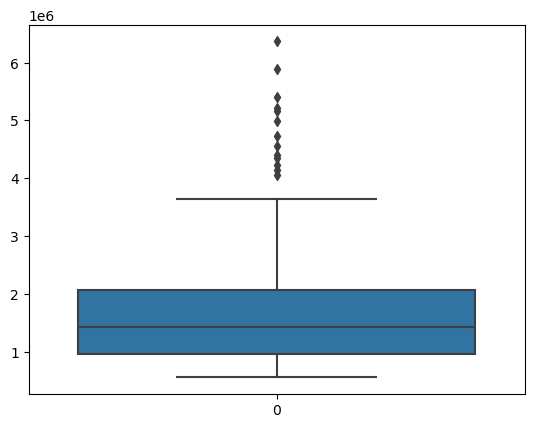

In [254]:
#checking Outliers
sns.boxplot(df_final['Price'])
plt.show()

In [255]:
df_final[df_final['Price']>39]

,Company,Model,Body_type,Varients,Seaters,Fuel_type,Transmission,Avaliable_No_of_color,Price
0,Tata,Nexon,SUV,85,5,Petrol,Manual,7,1315000.0
1,Tata,Punch,SUV,25,5,CNG,Manual,4,990000.0
2,Hyundai,Grand,Hatchback,11,5,Petrol,Manual,7,800000.0
3,Hyundai,Aura,Sedan,7,5,Petrol,Manual,6,963000.0
4,Tata,Tigor,Sedan,17,5,Petrol,Manual,4,925000.0
...,...,...,...,...,...,...,...,...,...
405,Hyundai,Aura,Sedan,6,5,Petrol,Manual,6,873000.0
406,Hyundai,Alcazar,SUV,6,7,Diesel,Automatic,10,2537000.0
407,Skoda,Slavia,Sedan,6,5,Petrol,Automatic,3,2095000.0
408,Hyundai,Venue,SUV,8,5,Petrol,Automatic,9,1586000.0


In [256]:
df_final.dtypes

Company                   object
Model                     object
Body_type                 object
Varients                   int64
Seaters                    int64
Fuel_type                 object
Transmission              object
Avaliable_No_of_color      int64
Price                    float64
dtype: object

In [257]:
df_final

,Company,Model,Body_type,Varients,Seaters,Fuel_type,Transmission,Avaliable_No_of_color,Price
0,Tata,Nexon,SUV,85,5,Petrol,Manual,7,1315000.0
1,Tata,Punch,SUV,25,5,CNG,Manual,4,990000.0
2,Hyundai,Grand,Hatchback,11,5,Petrol,Manual,7,800000.0
3,Hyundai,Aura,Sedan,7,5,Petrol,Manual,6,963000.0
4,Tata,Tigor,Sedan,17,5,Petrol,Manual,4,925000.0
...,...,...,...,...,...,...,...,...,...
405,Hyundai,Aura,Sedan,6,5,Petrol,Manual,6,873000.0
406,Hyundai,Alcazar,SUV,6,7,Diesel,Automatic,10,2537000.0
407,Skoda,Slavia,Sedan,6,5,Petrol,Automatic,3,2095000.0
408,Hyundai,Venue,SUV,8,5,Petrol,Automatic,9,1586000.0


In [258]:
df_final.Company.unique()

array(['Tata', 'Hyundai', 'Nissan', 'Maruti', 'Skoda', 'Honda',
       'Volkswagen', 'Mahindra', 'Toyota', 'MG', 'Kia', 'Citroen',
       'Renault', 'Jeep'], dtype=object)

In [259]:
df_final.Fuel_type.unique()

array(['Petrol', 'CNG', 'Diesel', 'Electric'], dtype=object)

In [260]:
df_final.Model.unique()

array(['Nexon', 'Punch', 'Grand', 'Aura', 'Tigor', 'Altroz', 'Tiago',
       'Venue', 'Creta', 'Alcazar', 'i20', 'Magnite', 'Suzuki', 'Kodiaq',
       'Amaze', 'City', 'Tiguan', 'Marazzo', 'Bolero', 'Scorpio-N',
       'XUV700', 'Urban', 'Glanza', 'Tucson', 'ZS', 'Hector', 'Gloster',
       'Comet', 'Astor', 'Sonet', 'Seltos', 'Carens', 'Taigun', 'Rumion',
       'Virtus', 'Slavia', 'Kushaq', 'Elevate', 'Exter', 'Innova',
       'Verna', 'Harrier', 'Scorpio', 'XUV400', 'Safari', 'Thar', 'C3',
       'Kiger', 'Kwid', 'Triber', 'Compass', 'XUV', 'Meridian', 'C5',
       'E-C3', 'XUV300', 'Fortuner'], dtype=object)

In [261]:
# Top 5 Companies

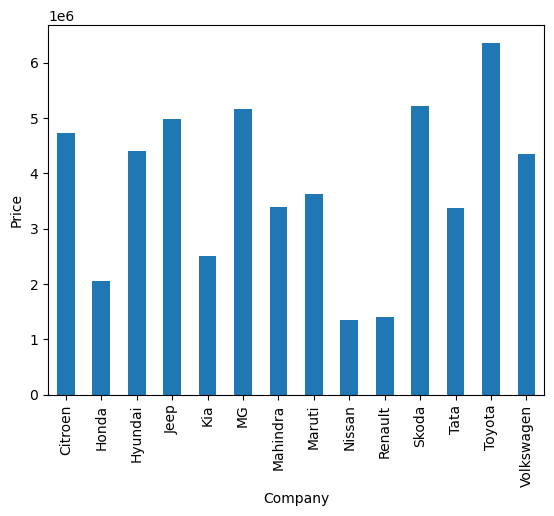

In [262]:


df_final.groupby('Company')['Price'].max().plot(kind='bar')
plt.ylabel('Price')
plt.show()


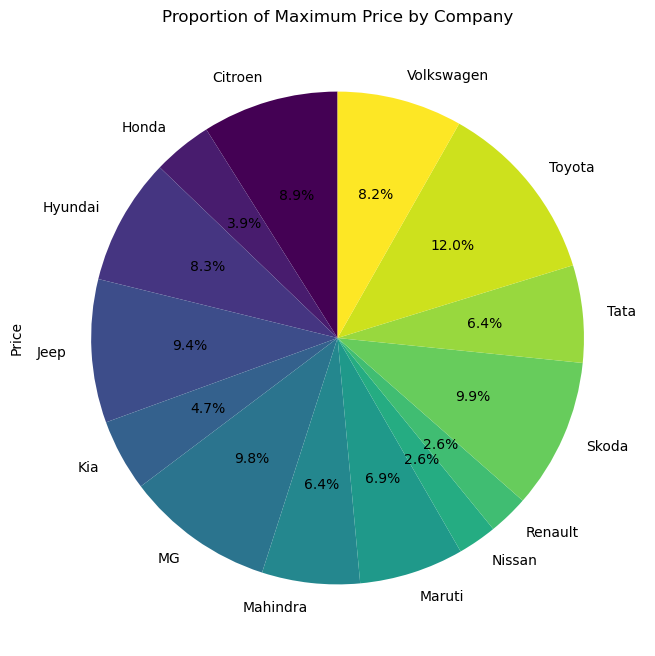

In [263]:
max_price_per_company = df_final.groupby('Company')['Price'].max()

# Plotting the pie chart
fig, ax = plt.subplots(figsize=(8, 8))
max_price_per_company.plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=ax, colormap='viridis')

# Adding title
plt.title('Proportion of Maximum Price by Company')

# Equal aspect ratio ensures that pie is drawn as a circle
ax.set_aspect('equal')

# Displaying the plot
plt.show()

In [264]:
# The average,minimum,maximum prices of comapanies,based on below data.

<Axes: xlabel='Company'>

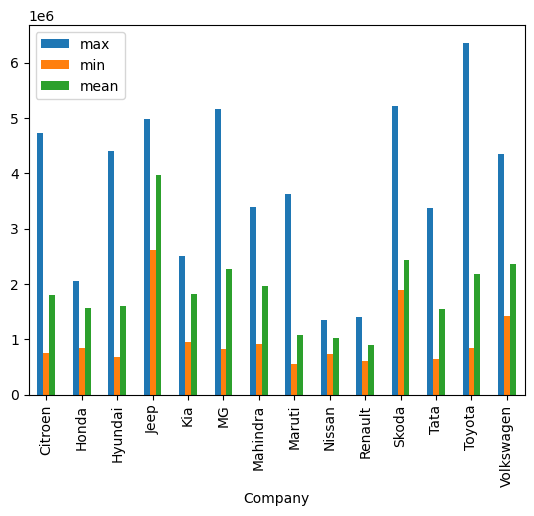

In [265]:
df_final.groupby(['Company'])['Price'].agg(['max', 'min', 'mean']).plot(kind='bar')

C:\Users\91949\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\91949\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



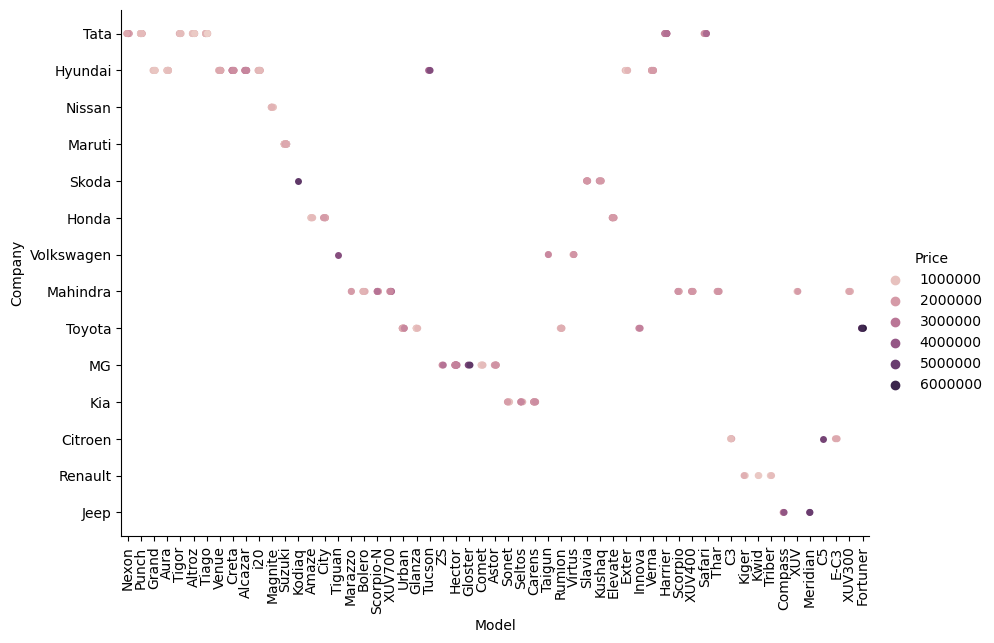

In [266]:
import seaborn
sns.catplot(x='Model',y='Company',hue='Price' ,data=df_final,height=6, aspect=1.5)
plt.xticks(rotation=90)
plt.show()

In [267]:
# According to the above data , We can observe price variations and  Distribution of models across the the comapanies

In [268]:
#Knowing each model,max,min,average price of car

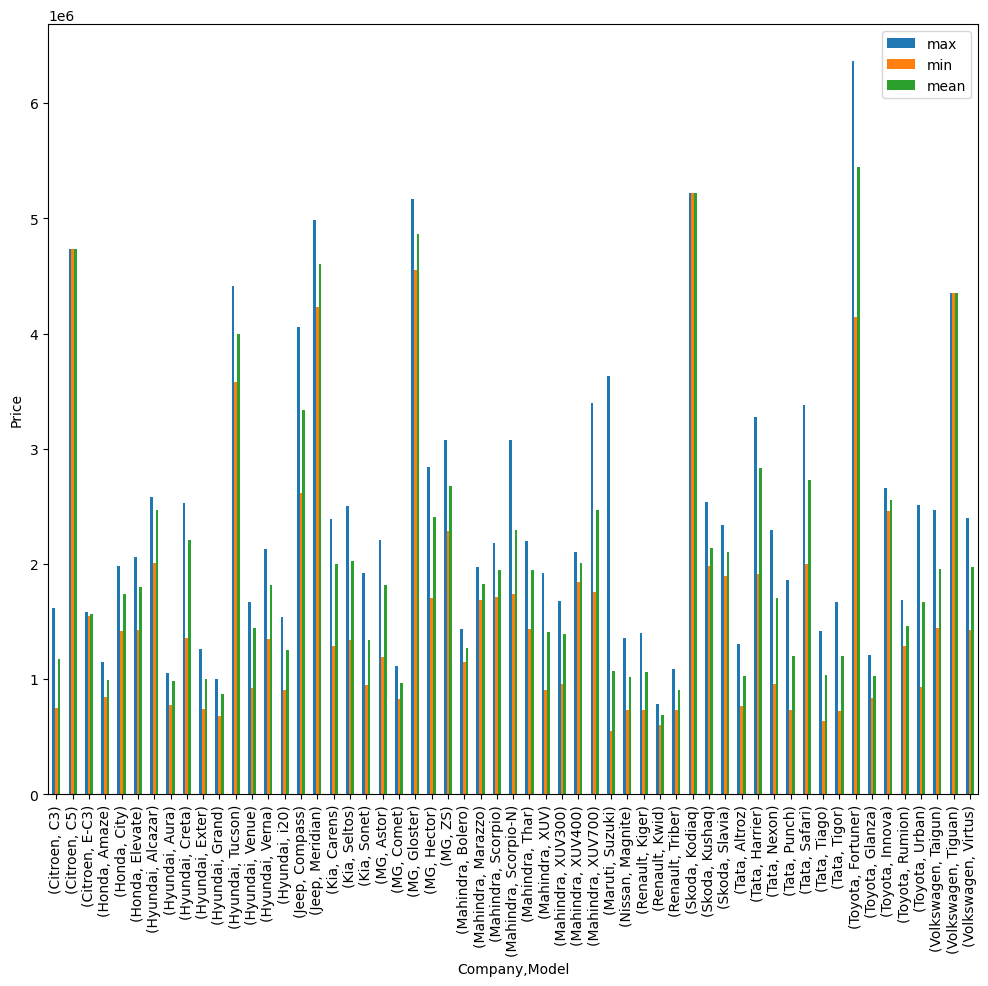

In [269]:
# fig = plt.figure(figsize=(10,12))
grouped_data=df_final.groupby(['Company', 'Model'])['Price'].agg(['max', 'min', 'mean'])
fig, ax = plt.subplots(figsize=(12, 10)) 
grouped_data.plot(kind='bar', ax=ax)
plt.ylabel('Price')
plt.show()

In [270]:
#

In [271]:
df_final.groupby(['Company', 'Model','Fuel_type'])['Price'].agg(['max', 'min', 'mean'])

max        min          mean
Company    Model  Fuel_type                                    
Citroen    C3     Petrol     1621000.0   754000.0  1.172750e+06
           C5     Diesel     4735000.0  4735000.0  4.735000e+06
           E-C3   Electric   1584000.0  1548000.0  1.566000e+06
Honda      Amaze  Petrol     1146000.0   848000.0  9.976000e+05
           City   Petrol     1984000.0  1420000.0  1.741333e+06
...                                ...        ...           ...
Toyota     Rumion Petrol     1690000.0  1293000.0  1.464200e+06
           Urban  Petrol     2515000.0   929000.0  1.666273e+06
Volkswagen Taigun Petrol     2467000.0  1447000.0  1.957000e+06
           Tiguan Petrol     4350000.0  4350000.0  4.350000e+06
           Virtus Petrol     2396000.0  1429000.0  1.974667e+06

[81 rows x 3 columns]

In [272]:
pivot_table = df_final.pivot_table(
    values='Price',
    index=['Company', 'Model', 'Fuel_type'],
    aggfunc={'Price': ['max', 'min', 'mean']}
)
pivot_table.columns = ['Price_max', 'Price_min', 'Price_mean']

In [273]:
pivot_table

Price_max     Price_min  Price_mean
Company    Model  Fuel_type                                     
Citroen    C3     Petrol     1621000.0  1.172750e+06    754000.0
           C5     Diesel     4735000.0  4.735000e+06   4735000.0
           E-C3   Electric   1584000.0  1.566000e+06   1548000.0
Honda      Amaze  Petrol     1146000.0  9.976000e+05    848000.0
           City   Petrol     1984000.0  1.741333e+06   1420000.0
...                                ...           ...         ...
Toyota     Rumion Petrol     1690000.0  1.464200e+06   1293000.0
           Urban  Petrol     2515000.0  1.666273e+06    929000.0
Volkswagen Taigun Petrol     2467000.0  1.957000e+06   1447000.0
           Tiguan Petrol     4350000.0  4.350000e+06   4350000.0
           Virtus Petrol     2396000.0  1.974667e+06   1429000.0

[81 rows x 3 columns]

In [274]:

pivot_table1 = df_final.pivot_table(
    values='Price',
    index=['Fuel_type'],
    aggfunc={'Price': ['max', 'min', 'mean']}
)
pivot_table1.columns = ['Price_max', 'Price_min', 'Price_mean']

In [275]:
pivot_table1

,Price_max,Price_min,Price_mean
Fuel_type,,,
CNG,1342000.0,9.687500e+05,683000.0
Diesel,6365000.0,2.583614e+06,1150000.0
Electric,3078000.0,1.661588e+06,825000.0
Petrol,5219000.0,1.388083e+06,553000.0


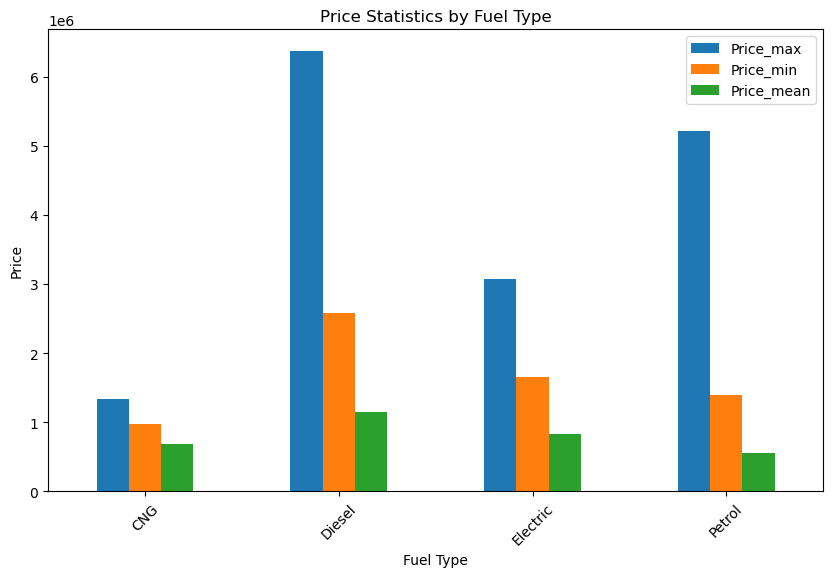

In [276]:
import matplotlib.pyplot as plt

# Assuming pivot_table1 is already created as per the previous step

# Plotting the bar plot
ax = pivot_table1.plot(kind='bar', figsize=(10, 6))

# Adding title and labels
plt.title('Price Statistics by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.xticks(rotation=45)

# Displaying the plot
plt.show()

In [277]:
###here we can see price various on fuel type

In [278]:
###conclusion
# we can see  the changes of fuel effect the price of a car

In [279]:
# Pivot table example
pivot_table = df_final.pivot_table(
    values='Price',
    index=['Company', 'Model', 'Transmission'],
    aggfunc={'Price': ['max', 'min', 'mean']}
)
pivot_table.columns = ['Price_max', 'Price_min', 'Price_mean']

In [280]:
pivot_table

Price_max     Price_min  Price_mean
Company    Model  Transmission                                     
Citroen    C3     Manual        1621000.0  1.172750e+06    754000.0
           C5     Automatic     4735000.0  4.735000e+06   4735000.0
           E-C3   Automatic     1584000.0  1.566000e+06   1548000.0
Honda      Amaze  Automatic     1146000.0  1.146000e+06   1146000.0
                  Manual         924000.0  8.986667e+05    848000.0
...                                   ...           ...         ...
Volkswagen Taigun Automatic     2467000.0  2.467000e+06   2467000.0
                  Manual        1447000.0  1.447000e+06   1447000.0
           Tiguan Automatic     4350000.0  4.350000e+06   4350000.0
           Virtus Automatic     2396000.0  2.247500e+06   2099000.0
                  Manual        1429000.0  1.429000e+06   1429000.0

[100 rows x 3 columns]

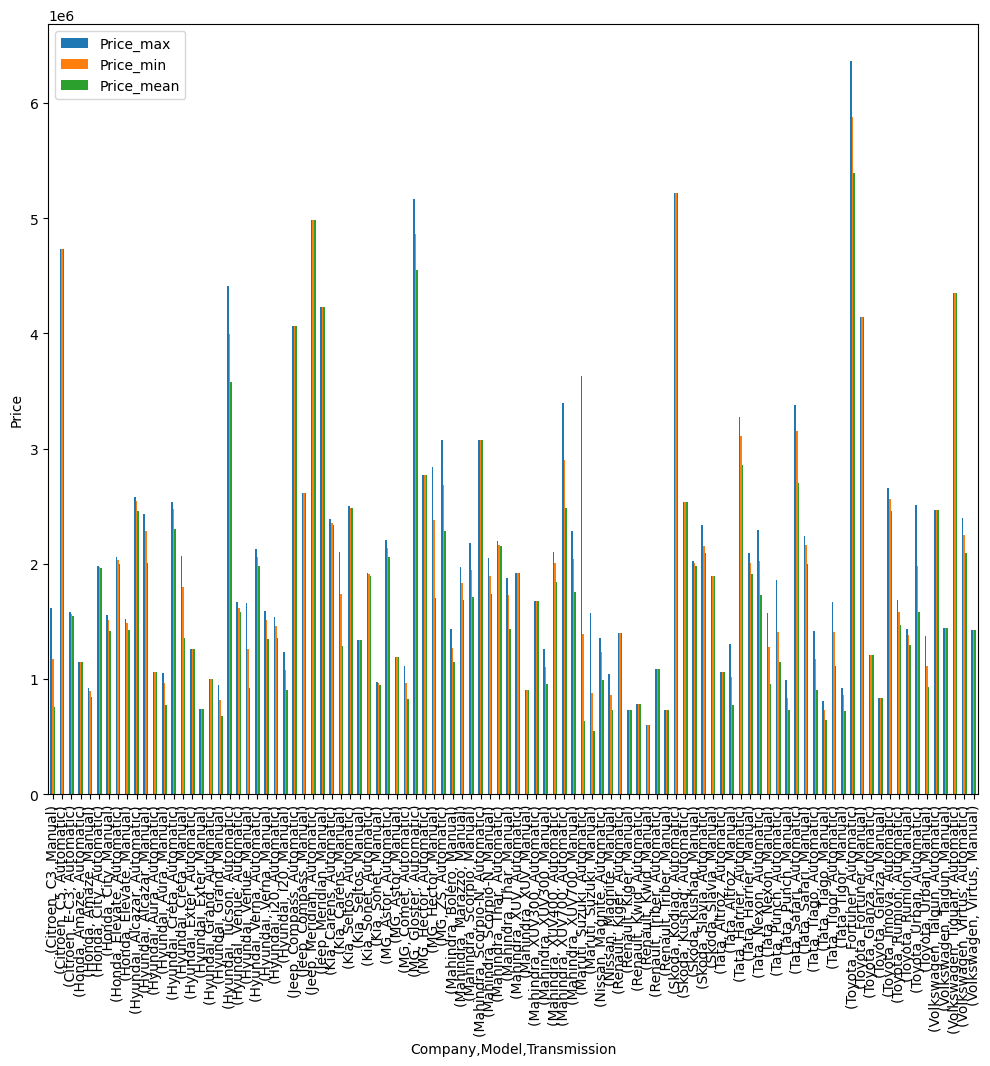

In [281]:
fig, ax = plt.subplots(figsize=(12, 10)) 
pivot_table.plot(kind='bar', ax=ax)
plt.ylabel('Price')
plt.show()


In [282]:

p = df_final.pivot_table(
    values='Price',
    index=['Company', 'Transmission'],
    aggfunc={'Price': ['max', 'min', 'mean']}
)
p.columns = ['Price_max', 'Price_min', 'Price_mean']

In [283]:
p

Price_max     Price_min  Price_mean
Company    Transmission                                     
Citroen    Automatic     4735000.0  2.622333e+06   1548000.0
           Manual        1621000.0  1.172750e+06    754000.0
Honda      Automatic     2059000.0  1.817111e+06   1146000.0
           Manual        1554000.0  1.298889e+06    848000.0
Hyundai    Automatic     4409000.0  1.979632e+06   1002000.0
           Manual        2429000.0  1.242211e+06    681000.0
Jeep       Automatic     4983000.0  4.522000e+06   4061000.0
           Manual        4227000.0  3.421000e+06   2615000.0
Kia        Automatic     2502000.0  2.295000e+06   1897000.0
           Manual        2104000.0  1.392444e+06    951000.0
MG         Automatic     5169000.0  2.328231e+06    825000.0
           Manual        2843000.0  2.220467e+06   1190000.0
Mahindra   Automatic     3401000.0  2.328941e+06   1681000.0
           Manual        2286000.0  1.691500e+06    909000.0
Maruti     Automatic     3633000.0  1.391152e+06    634000.0
           Manual        1578000.0  8.810182e+05    553000.0
Nissan     Automatic     1355000.0  1.233667e+06    991000.0
           Manual        1043000.0  8.597500e+05    732000.0
Renault    Automatic     1401000.0  1.090000e+06    783000.0
           Manual         729000.0  6.873333e+05    604000.0
Skoda      Automatic     5219000.0  2.730000e+06   2095000.0
           Manual        2023000.0  1.981250e+06   1893000.0
Tata       Automatic     3382000.0  1.810152e+06    902000.0
           Manual        2243000.0  1.157567e+06    641000.0
Toyota     Automatic     6365000.0  2.639125e+06   1211000.0
           Manual        4146000.0  1.443500e+06    840000.0
Volkswagen Automatic     4350000.0  2.828000e+06   2099000.0
           Manual        1447000.0  1.438000e+06   1429000.0

In [284]:
#### here we can see  transmission type effect the price of a car

In [285]:
# Pivot table example
t = df_final.pivot_table(
    values='Price',
    index=['Transmission'],
    aggfunc={'Price': ['max', 'min', 'mean']}
)
t.columns = ['Price_max', 'Price_min', 'Price_mean']

In [286]:
t

,Price_max,Price_min,Price_mean
Transmission,,,
Automatic,6365000.0,2.003851e+06,634000.0
Manual,4227000.0,1.295608e+06,553000.0


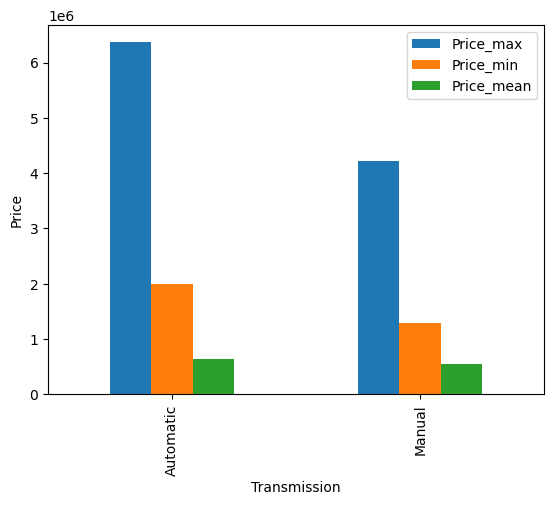

In [287]:
t = df_final.pivot_table(
    values='Price',
    index=['Transmission'],
    aggfunc={'Price': ['max', 'min', 'mean']}
)
t.columns = ['Price_max', 'Price_min', 'Price_mean']
t.plot(kind='bar')
plt.ylabel('Price')
plt.show()


In [288]:
# we can see the Automatic transimission have high price compare to the manual Transmission

In [289]:
df_final

,Company,Model,Body_type,Varients,Seaters,Fuel_type,Transmission,Avaliable_No_of_color,Price
0,Tata,Nexon,SUV,85,5,Petrol,Manual,7,1315000.0
1,Tata,Punch,SUV,25,5,CNG,Manual,4,990000.0
2,Hyundai,Grand,Hatchback,11,5,Petrol,Manual,7,800000.0
3,Hyundai,Aura,Sedan,7,5,Petrol,Manual,6,963000.0
4,Tata,Tigor,Sedan,17,5,Petrol,Manual,4,925000.0
...,...,...,...,...,...,...,...,...,...
405,Hyundai,Aura,Sedan,6,5,Petrol,Manual,6,873000.0
406,Hyundai,Alcazar,SUV,6,7,Diesel,Automatic,10,2537000.0
407,Skoda,Slavia,Sedan,6,5,Petrol,Automatic,3,2095000.0
408,Hyundai,Venue,SUV,8,5,Petrol,Automatic,9,1586000.0


In [290]:
###Is varients  effect on price

In [291]:
# Pivot table example
v = df_final.pivot_table(
    values='Price',
    index=['Company','Seaters'],
    aggfunc={'Price': ['max', 'min', 'mean']}
)
v.columns = ['Price_max', 'Price_min', 'Price_mean']

In [292]:
v

Price_max     Price_min  Price_mean
Company    Seaters                                     
Citroen    5        4735000.0  1.944800e+06    754000.0
           7        1621000.0  1.417000e+06   1213000.0
Honda      5        2059000.0  1.558000e+06    848000.0
Hyundai    5        4409000.0  1.481273e+06    681000.0
           7        2581000.0  2.466600e+06   2010000.0
Jeep       5        4061000.0  3.338000e+06   2615000.0
           7        4983000.0  4.605000e+06   4227000.0
Kia        5        2502000.0  1.685900e+06    951000.0
           7        2394000.0  2.004714e+06   1288000.0
MG         4        1117000.0  9.662500e+05    825000.0
           5        3078000.0  2.173400e+06   1190000.0
           6        5169000.0  4.861000e+06   4553000.0
           7        2843000.0  2.483714e+06   2123000.0
Mahindra   4        2199000.0  1.949667e+06   1433000.0
           5        3401000.0  2.011632e+06    909000.0
           7        3079000.0  1.891812e+06   1150000.0
Maruti     4        1849000.0  9.175000e+05    575000.0
           5        2473000.0  9.733857e+05    553000.0
           6        1834000.0  1.616750e+06   1446000.0
           7        3633000.0  2.070000e+06   1050000.0
Nissan     5        1355000.0  1.020000e+06    732000.0
Renault    5        1401000.0  8.792500e+05    604000.0
           7        1086000.0  9.075000e+05    729000.0
Skoda      5        2539000.0  2.120667e+06   1893000.0
           7        5219000.0  5.219000e+06   5219000.0
Tata       5        3272000.0  1.433319e+06    641000.0
           7        3382000.0  2.727857e+06   2000000.0
Toyota     5        2515000.0  1.495400e+06    840000.0
           7        6365000.0  3.111818e+06   1293000.0
Volkswagen 5        4350000.0  2.364667e+06   1429000.0

In [294]:
# It show the variation of prices based on Company and car seaters.

In [295]:
###  seaters

In [296]:
# Pivot table example
s = df_final.pivot_table(
    values='Price',
    index=['Seaters'],
    aggfunc={'Price': ['max', 'min', 'mean']}
)
s.columns = ['Price_max', 'Price_min', 'Price_mean']

In [297]:
s


,Price_max,Price_min,Price_mean
Seaters,,,
4,2199000.0,1.272389e+06,575000.0
5,4735000.0,1.470752e+06,553000.0
6,5169000.0,2.698167e+06,1446000.0
7,6365000.0,2.410944e+06,729000.0


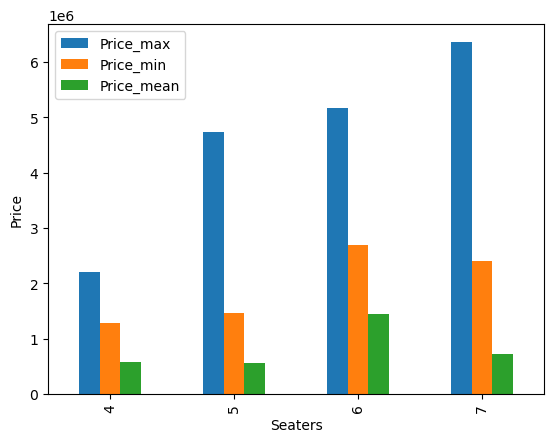

In [298]:
# Pivot table example
s = df_final.pivot_table(
    values='Price',
    index=['Seaters'],
    aggfunc={'Price': ['max', 'min', 'mean']}
)
s.columns = ['Price_max', 'Price_min', 'Price_mean']
s.plot(kind='bar')
plt.ylabel('Price')
plt.show()

In [299]:
# Distribution of prices across the seaters.

In [300]:
# colors


In [301]:
# based on comapny
c= df_final.pivot_table(
    values='Price',
    index=['Company','Model','Avaliable_No_of_color'],
    aggfunc={'Price': ['max', 'min', 'mean']}
)
c.columns = ['Price_max', 'Price_min', 'Price_mean']

In [302]:
c

Price_max  Price_min  Price_mean
Company    Model  Avaliable_No_of_color                                  
Citroen    C3     4                      1213000.0   983500.0    754000.0
                  6                      1103000.0  1103000.0   1103000.0
                  10                     1621000.0  1621000.0   1621000.0
           C5     7                      4735000.0  4735000.0   4735000.0
           E-C3   4                      1548000.0  1548000.0   1548000.0
...                                            ...        ...         ...
Volkswagen Taigun 5                      1447000.0  1447000.0   1447000.0
           Tiguan 7                      4350000.0  4350000.0   4350000.0
           Virtus 1                      2396000.0  2396000.0   2396000.0
                  4                      2099000.0  2099000.0   2099000.0
                  7                      1429000.0  1429000.0   1429000.0

[191 rows x 3 columns]

In [303]:
# based on comapny
c1= df_final.pivot_table(
    values='Price',
    index=['Company','Model','Avaliable_No_of_color'],
    aggfunc={'Price': ['max', 'min', 'mean']}
)
c1.columns = ['Price_max', 'Price_min', 'Price_mean']

In [304]:
c1

Price_max  Price_min  Price_mean
Company    Model  Avaliable_No_of_color                                  
Citroen    C3     4                      1213000.0   983500.0    754000.0
                  6                      1103000.0  1103000.0   1103000.0
                  10                     1621000.0  1621000.0   1621000.0
           C5     7                      4735000.0  4735000.0   4735000.0
           E-C3   4                      1548000.0  1548000.0   1548000.0
...                                            ...        ...         ...
Volkswagen Taigun 5                      1447000.0  1447000.0   1447000.0
           Tiguan 7                      4350000.0  4350000.0   4350000.0
           Virtus 1                      2396000.0  2396000.0   2396000.0
                  4                      2099000.0  2099000.0   2099000.0
                  7                      1429000.0  1429000.0   1429000.0

[191 rows x 3 columns]

In [305]:
df_final

,Company,Model,Body_type,Varients,Seaters,Fuel_type,Transmission,Avaliable_No_of_color,Price
0,Tata,Nexon,SUV,85,5,Petrol,Manual,7,1315000.0
1,Tata,Punch,SUV,25,5,CNG,Manual,4,990000.0
2,Hyundai,Grand,Hatchback,11,5,Petrol,Manual,7,800000.0
3,Hyundai,Aura,Sedan,7,5,Petrol,Manual,6,963000.0
4,Tata,Tigor,Sedan,17,5,Petrol,Manual,4,925000.0
...,...,...,...,...,...,...,...,...,...
405,Hyundai,Aura,Sedan,6,5,Petrol,Manual,6,873000.0
406,Hyundai,Alcazar,SUV,6,7,Diesel,Automatic,10,2537000.0
407,Skoda,Slavia,Sedan,6,5,Petrol,Automatic,3,2095000.0
408,Hyundai,Venue,SUV,8,5,Petrol,Automatic,9,1586000.0


In [306]:
df_final.Transmission.value_counts()

Transmission
Manual       209
Automatic    201
Name: count, dtype: int64

In [307]:
#comapany ,models

In [308]:
df_final.groupby('Company')['Model'].unique()

Company
Citroen                                          [C3, C5, E-C3]
Honda                                    [Amaze, City, Elevate]
Hyundai       [Grand, Aura, Venue, Creta, Alcazar, i20, Tucs...
Jeep                                        [Compass, Meridian]
Kia                                     [Sonet, Seltos, Carens]
MG                          [ZS, Hector, Gloster, Comet, Astor]
Mahindra      [Marazzo, Bolero, Scorpio-N, XUV700, Scorpio, ...
Maruti                                                 [Suzuki]
Nissan                                                [Magnite]
Renault                                   [Kiger, Kwid, Triber]
Skoda                                  [Kodiaq, Slavia, Kushaq]
Tata          [Nexon, Punch, Tigor, Altroz, Tiago, Harrier, ...
Toyota                [Urban, Glanza, Rumion, Innova, Fortuner]
Volkswagen                             [Tiguan, Taigun, Virtus]
Name: Model, dtype: object

In [309]:
df_final

,Company,Model,Body_type,Varients,Seaters,Fuel_type,Transmission,Avaliable_No_of_color,Price
0,Tata,Nexon,SUV,85,5,Petrol,Manual,7,1315000.0
1,Tata,Punch,SUV,25,5,CNG,Manual,4,990000.0
2,Hyundai,Grand,Hatchback,11,5,Petrol,Manual,7,800000.0
3,Hyundai,Aura,Sedan,7,5,Petrol,Manual,6,963000.0
4,Tata,Tigor,Sedan,17,5,Petrol,Manual,4,925000.0
...,...,...,...,...,...,...,...,...,...
405,Hyundai,Aura,Sedan,6,5,Petrol,Manual,6,873000.0
406,Hyundai,Alcazar,SUV,6,7,Diesel,Automatic,10,2537000.0
407,Skoda,Slavia,Sedan,6,5,Petrol,Automatic,3,2095000.0
408,Hyundai,Venue,SUV,8,5,Petrol,Automatic,9,1586000.0


In [310]:
# body_type

In [311]:
df_final.groupby(['Company', 'Model','Body_type'])['Price'].agg(['max', 'min', 'mean'])

max        min          mean
Company    Model  Body_type                                    
Citroen    C3     SUV        1621000.0   754000.0  1.172750e+06
           C5     SUV        4735000.0  4735000.0  4.735000e+06
           E-C3   SUV        1584000.0  1548000.0  1.566000e+06
Honda      Amaze  Sedan      1146000.0   848000.0  9.976000e+05
           City   Sedan      1984000.0  1420000.0  1.741333e+06
...                                ...        ...           ...
Toyota     Rumion SUV        1690000.0  1293000.0  1.464200e+06
           Urban  SUV        2515000.0   929000.0  1.666273e+06
Volkswagen Taigun SUV        2467000.0  1447000.0  1.957000e+06
           Tiguan SUV        4350000.0  4350000.0  4.350000e+06
           Virtus Sedan      2396000.0  1429000.0  1.974667e+06

[62 rows x 3 columns]

In [312]:
df_final.groupby(['Company','Body_type'])['Price'].agg(['max', 'min', 'mean'])

max        min          mean
Company    Body_type                                      
Citroen    SUV          4735000.0   754000.0  1.794000e+06
Honda      SUV          2059000.0  1430000.0  1.801143e+06
           Sedan        1984000.0   848000.0  1.403273e+06
Hyundai    Hatchback    1538000.0   681000.0  1.104111e+06
           SUV          4409000.0   741000.0  1.973100e+06
           Sedan        2128000.0   774000.0  1.312889e+06
Jeep       SUV          4983000.0  2615000.0  3.971500e+06
Kia        SUV          2502000.0   951000.0  1.817176e+06
MG         Hatchback    1117000.0   825000.0  9.662500e+05
           SUV          5169000.0  1190000.0  2.487875e+06
Mahindra   MPV/MUV      1974000.0  1688000.0  1.831000e+06
           SUV          3401000.0   909000.0  1.962205e+06
Maruti     Convertible  1094000.0   737000.0  8.918000e+05
           Hatchback    1190000.0   553000.0  8.163056e+05
           Minivan/Van   803000.0   645000.0  7.127143e+05
           SUV          3633000.0   575000.0  1.485733e+06
           Sedan        1557000.0   789000.0  1.095700e+06
Nissan     SUV          1355000.0   732000.0  1.020000e+06
Renault    Hatchback     783000.0   604000.0  6.935000e+05
           MPV/MUV      1086000.0   729000.0  9.075000e+05
           SUV          1401000.0   729000.0  1.065000e+06
Skoda      SUV          5219000.0  1986000.0  2.758000e+06
           Sedan        2337000.0  1893000.0  2.103000e+06
Tata       Convertible  1671000.0  1520000.0  1.610333e+06
           Hatchback    1420000.0   641000.0  1.033400e+06
           SUV          3382000.0   735000.0  1.919372e+06
           Sedan        1110000.0   725000.0  9.590000e+05
Toyota     Hatchback    1211000.0   840000.0  1.025500e+06
           SUV          6365000.0   929000.0  2.389045e+06
Volkswagen SUV          4350000.0  1447000.0  2.754667e+06
           Sedan        2396000.0  1429000.0  1.974667e+06

In [313]:
df_final.groupby(['Body_type'])['Price'].agg(['max', 'min', 'mean'])

,max,min,mean
Body_type,,,
Convertible,1671000.0,737000.0,1.161250e+06
Hatchback,1538000.0,553000.0,9.488764e+05
MPV/MUV,1974000.0,729000.0,1.369250e+06
Minivan/Van,803000.0,645000.0,7.127143e+05
SUV,6365000.0,575000.0,1.992364e+06
Sedan,2396000.0,725000.0,1.370365e+06


In [314]:
df_final

,Company,Model,Body_type,Varients,Seaters,Fuel_type,Transmission,Avaliable_No_of_color,Price
0,Tata,Nexon,SUV,85,5,Petrol,Manual,7,1315000.0
1,Tata,Punch,SUV,25,5,CNG,Manual,4,990000.0
2,Hyundai,Grand,Hatchback,11,5,Petrol,Manual,7,800000.0
3,Hyundai,Aura,Sedan,7,5,Petrol,Manual,6,963000.0
4,Tata,Tigor,Sedan,17,5,Petrol,Manual,4,925000.0
...,...,...,...,...,...,...,...,...,...
405,Hyundai,Aura,Sedan,6,5,Petrol,Manual,6,873000.0
406,Hyundai,Alcazar,SUV,6,7,Diesel,Automatic,10,2537000.0
407,Skoda,Slavia,Sedan,6,5,Petrol,Automatic,3,2095000.0
408,Hyundai,Venue,SUV,8,5,Petrol,Automatic,9,1586000.0


In [315]:
#comparsion of prices baesd on comapanies

In [316]:
import matplotlib.pyplot as plt

In [317]:
import  seaborn as sns

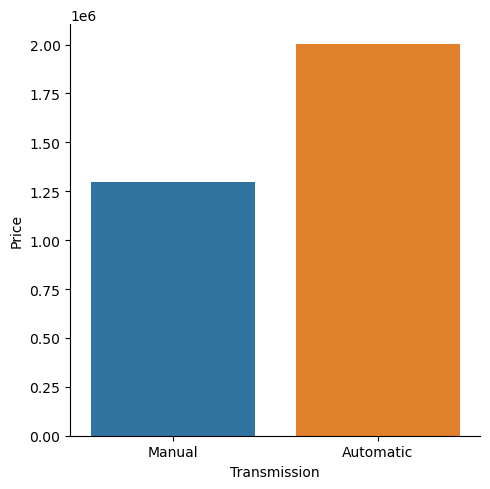

In [318]:
sns.catplot(data=df_final, x="Transmission", y="Price", kind="bar",errorbar=None)
plt.show()


In [319]:
#  It shows Automatic Cars are most expensive then the manual cars

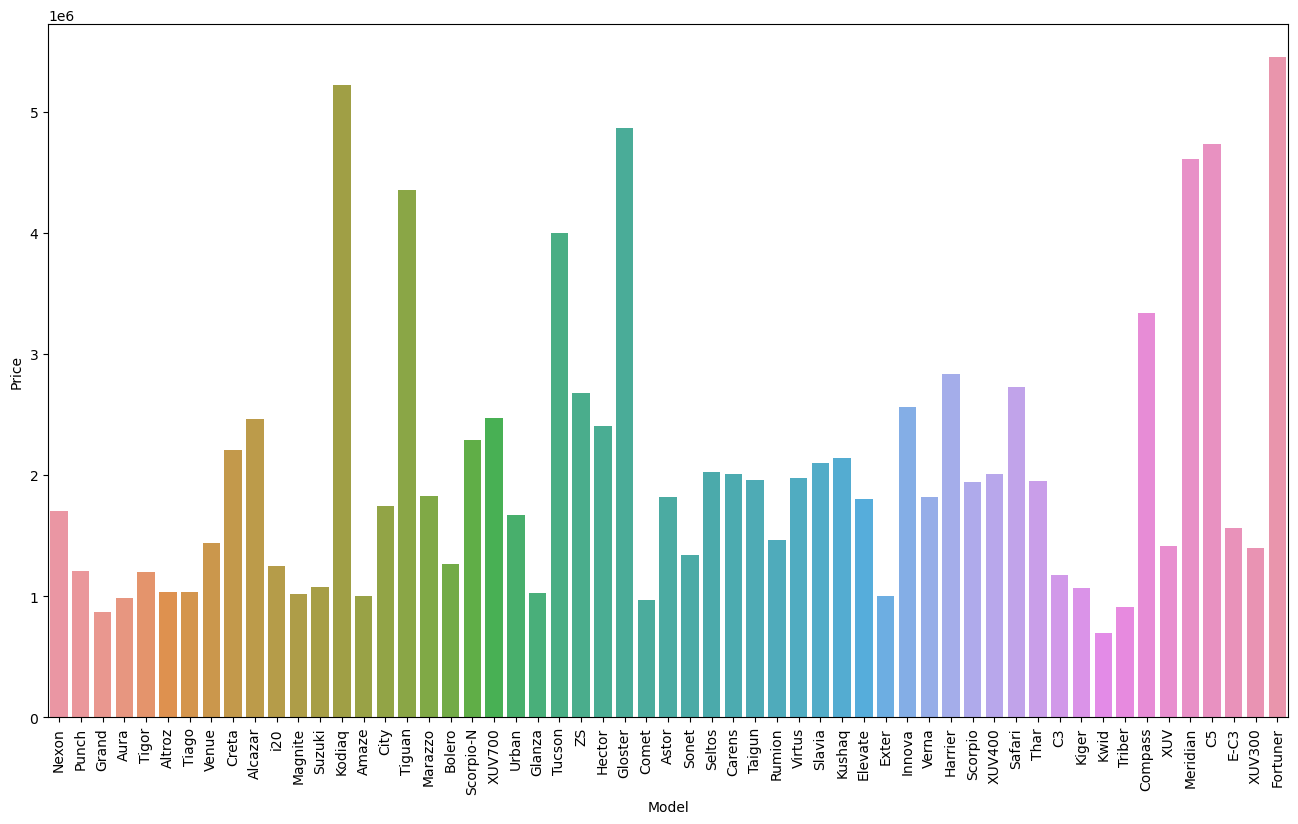

In [320]:
fig = plt.figure(figsize=(16, 9))
sns.barplot(data=df_final, x="Model", y="Price",errorbar=None)
plt.xticks(rotation=90)
plt.show()


In [321]:
import seaborn as sns

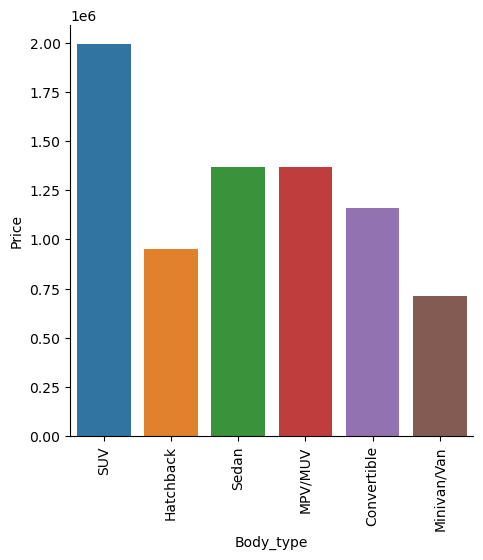

In [322]:
sns.catplot(data=df_final, x="Body_type", y="Price", kind="bar",errorbar=None)
plt.xticks(rotation=90)
plt.show()


In [323]:
# It shows the price variances based their car bodytypes

In [324]:
#know company anad there models

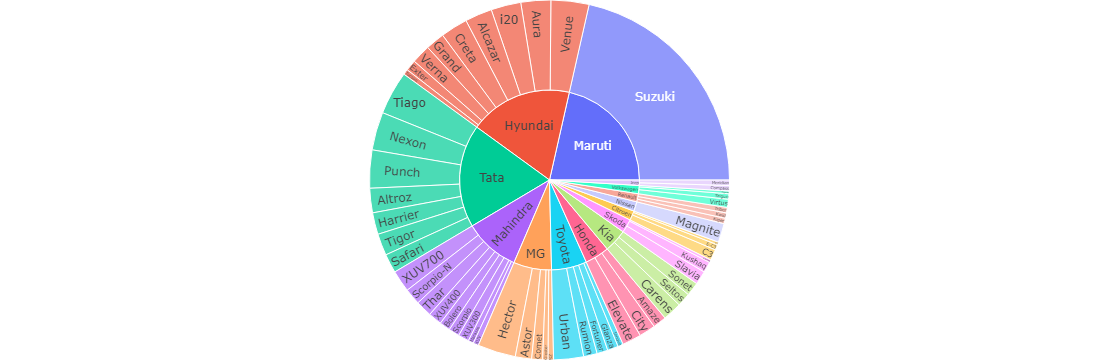

In [335]:
import plotly.express as px

fig = px.sunburst(df_final, path=['Company', 'Model'])
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))

fig.write_html("sunburst_chart.html")
fig.show()



We can see how many models are available in Company

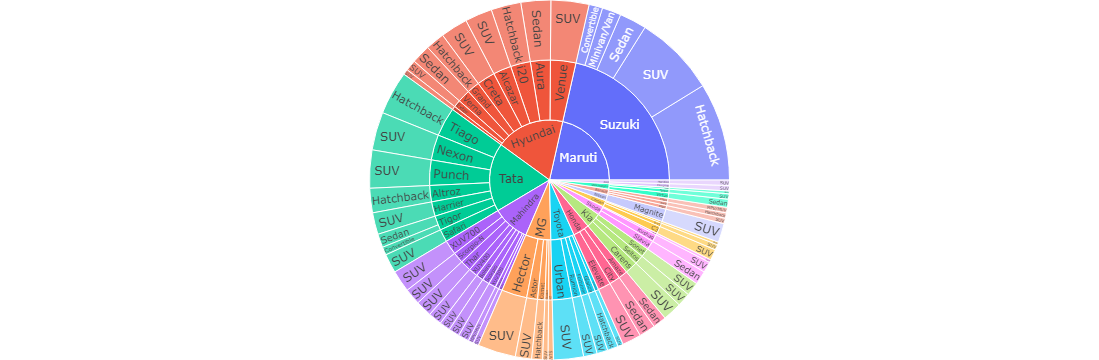

In [337]:
import plotly.express as px

fig = px.sunburst(df_final, path=['Company', 'Model','Body_type'])
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))

fig.write_html("sunburst_chart2.html")
fig.show()


We can see how many Body_type are available in Company & model

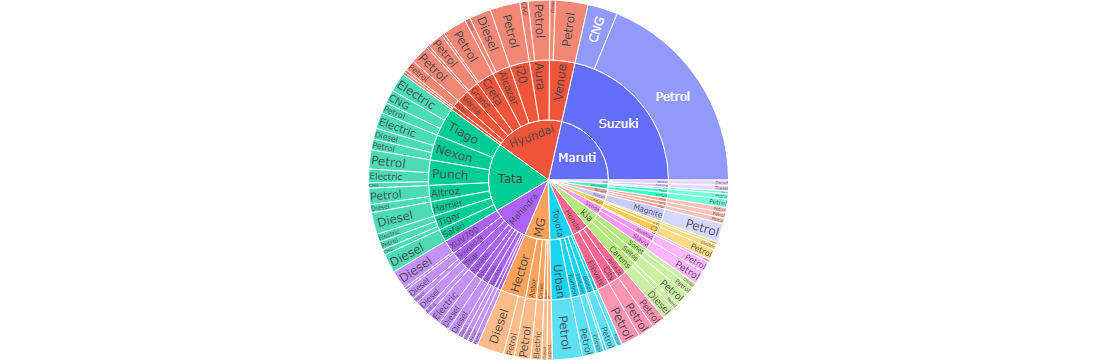

In [338]:
import plotly.express as px

fig = px.sunburst(df_final, path=['Company', 'Model','Fuel_type'])
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))
fig.write_html("sunburst_chart3.html")
fig.show()


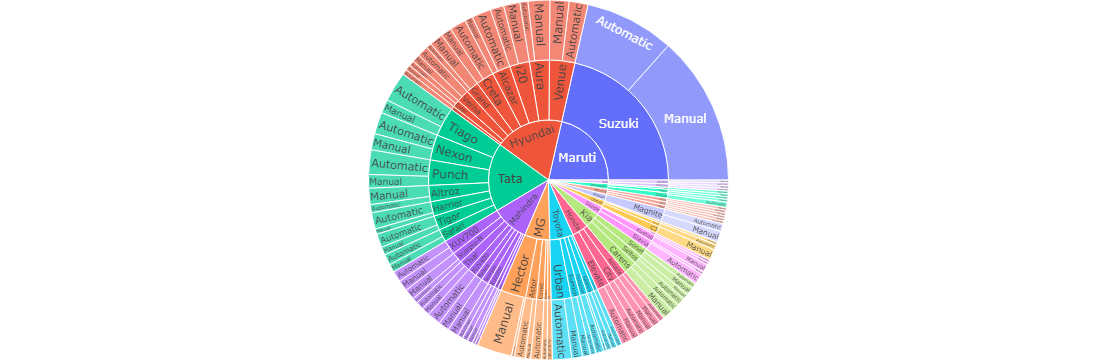

In [339]:
import plotly.express as px




fig = px.sunburst(df_final, path=['Company', 'Model','Transmission'])
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))
fig.write_html("sunburst_chart4.html")
fig.show()


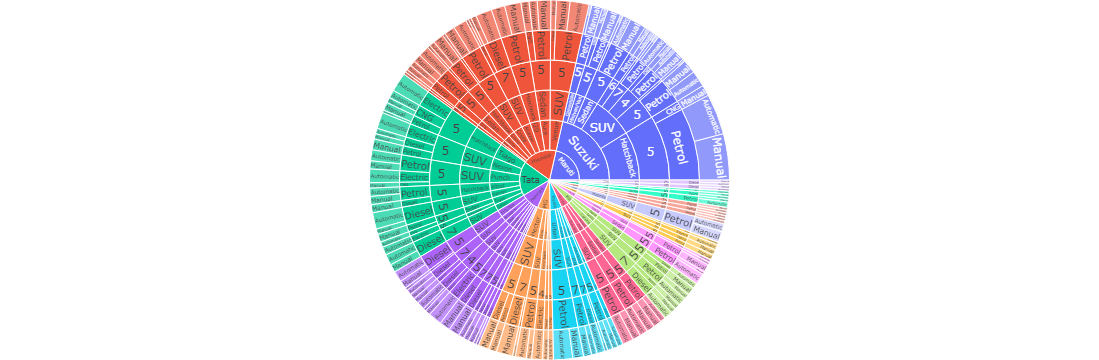

In [342]:
import plotly.express as px
import plotly.io as pio


fig = px.sunburst(df_final, path=['Company', 'Model','Body_type', 'Seaters', 'Fuel_type',
       'Transmission'])
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))

fig.write_html("sunburst_chart5.html")
fig.show()

